# Physique Statistique - Travail d'analyse numérique 

<b> Nom </b> : Nicolas De Ro Miralles <br>
<b> Matricule </b> : 000459498 <br>
<b> Section </b> : BA3-PHYS

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import sympy as sp
import time
import matplotlib.patches as mpl_patches
import seaborn as sbn

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

<font color="red"><b>Remarque (1) :</b></font> Certaines cellules sont précédées d'un avertissement en <font color="red">rouge</font>. Ces cellules peuvent mettre un certain temps à s'exécuter.

<font color="red"><b>Remarque (2) :</b></font> Au cours de l'exécution du notebook, la police LaTex peut ne pas s'afficher correctement. Si c'est le cas, il faut double-cliquer sur chacune des cellules en question et puis les exécuter. Ceci résout le problème.

## Leçon 2 : Nombres aléatoires

<font color="blue"> <u> Enoncés </u> </font>

<font color="blue">
    
1) Python possède plusieurs générateurs de nombres aléatoires pré-construits. Regarder la documentation adéquate et en essayer quelques-uns. En particulier, comparer les valeurs des générateurs de nombres aléatoires distribués selon une distribution gaussienne et exponentielle avec les versions consrtuites dans la lesson 2. 

<br> <br>

2) Un autre algorithme populaire afin de générer des nombres distribués selon une distributuon gaussienne est l'algorithme de Box-Muller. Examiner la méthode de fonctionnement de cet algorithme et l'implémenter en Python.

<br> <br>
</font>

1) Pour commencer, présentons quelqu'uns des générateurs de nombres aléatoires pré-construits dans Python. Regardons pour ce faire quelques distributions connues telles que,

- La distribution uniforme
- La ditribution exponentielle
- La distibution gaussienne
- La distribution log-normale

Les trois premières nous sont très familières. La quatrième un peu moins. 

Rappelons l'expression de la densité de probabilité dans chacun des cas.


$$
f_{\text{uniforme}}(x) = \left\{
    \begin{array}{ll}
        \frac{1}{b-a} & \text{si} \;  x\in [a,b] \\
        0 & \text{sinon} \\
    \end{array}
\right.
\quad \hspace{2cm}
f_{\text{exponentielle}}(x;\lambda) = \left\{
    \begin{array}{ll}
        \lambda e^{-\lambda x} & \text{si} \;  x\geq0 \\
        0 & \text{sinon} \\
    \end{array}
\right.
$$

$$
f_{\text{gaussienne}}(x;\mu,\sigma) = \frac1{\sigma \sqrt{2\pi}}\operatorname e^{-\frac12\left(\frac{x-\mu}{\sigma}\right)^2}
\quad \hspace{2cm}
f_{\text{log-normale}}(x;\mu,\sigma)=\frac{1}{x \sigma \sqrt{2 \pi}} \exp\left(- \frac{(\ln x - \mu)^2}{2\sigma^2}\right)$$

Pour information, une variable alétaoire $X$ suit une distribution log-normale de paramètre $\mu$ et $\sigma^2$ si la variable aléatoire $Y=\ln(X)$ suit une loi normale de paramètres $\mu$ et $\sigma^2$.

Pour chacunes de ces distributions, on va implémenter un petit code qui permet de visualiser l'histogramme des nombres aléatoires produits.

In [2]:
def plot_histogram(binwidth,x_min,x_max,y):
    x=binwidth
    plt.xlim(x_min,x_max)
    plt.hist(y,bins=np.arange(x_min,x_max, x),normed=True);

La documentation qui suit est issue de https://docs.python.org/3/library/random.html.


<b>Remarque :</b> on aurait aussi pu utiliser NumPy.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


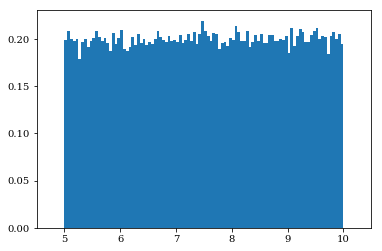

In [3]:
uniform=[] 
for i in range(0,100000):
    uniform.append(random.uniform(5,10)) # Distribution uniforme.

plot_histogram(0.05,4.5,10.5,uniform)

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


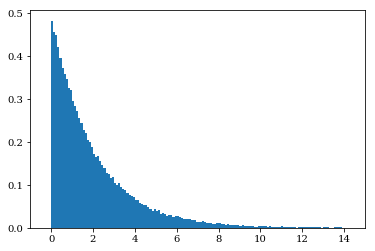

In [4]:
exponential=[] 
for i in range(0,100000):
    exponential.append(random.expovariate(1/2)) # Distribution exponentielle d'espérance 1/2.

plot_histogram(0.1,-1,15,exponential)

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


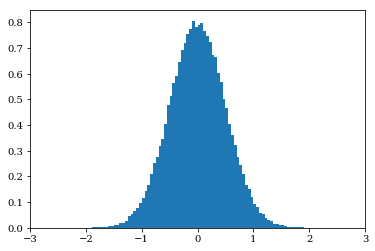

In [5]:
gaussian=[] 
for i in range(0,100000):
    gaussian.append(random.gauss(0,1/2)) # Distribution gaussienne d'espérance 0 et d'écart-type 1/2.

plot_histogram(0.05,-3,3,gaussian)

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


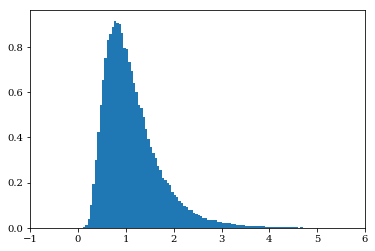

In [6]:
log_normal=[] 
for i in range(0,100000):
    log_normal.append(random.lognormvariate(0,1/2)) # Distribution log-normale d'espérance 0 et d'écart-type 1/2.

plot_histogram(0.05,-1,6,log_normal)

En prenant le logarithme de la distribution log-normale, on retrouve uen distribution gaussienne de mêmes paramètres $\mu$ et $\sigma$.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


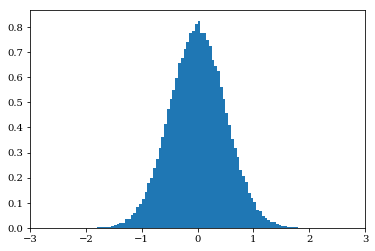

In [7]:
log_normal=[] 
for i in range(0,100000):
    log_normal.append(np.log(random.lognormvariate(0,1/2))) # Distribution gaussienne d'espérance 0 et d'écart-type 1/2.

plot_histogram(0.05,-3,3,log_normal)

Comparons à présent les générateurs de nombres aléatoires distribués selon une distribution exponentielle et gaussienne présentés ci-dessus avec les générateurs utilisés dans la leçon 2.

- Pour la distribution exponentielle, nous avions utilisé la méthode de la distribution inverse. Pour rappel, l'idée est que si $X\sim \text{unif}[0,1]$ alors, on a que $F_{\text{exponentielle}}^{-1}(X; \lambda) \sim \text{exp}(\lambda)$ où $F_{\text{exponentielle}}^{-1}$ est la fonction cumulative inverse et $\text{exp}(\lambda)$ est une distribution exponentielle d'espérance $\frac{1}{\lambda}$.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


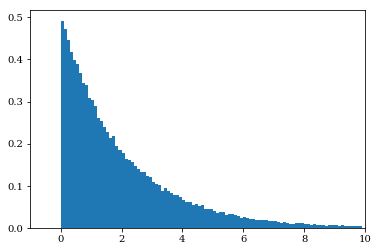

In [8]:
x_unif=np.random.random_sample(100000)
y_exp=-2*np.log(1-x_unif) # Y suit une distribution exponentielle d'espérance 1/2.
plot_histogram(0.1,-1,10,y_exp)

Superposons ci-dessous les deux distributions. En bleu il s'agit du générateur utilisé en leçon 2 et en orange il s'agit du générateur pré-construit.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


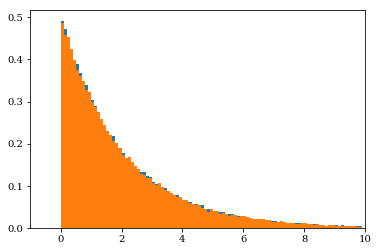

In [9]:
plot_histogram(0.1,-1,10,y_exp)
plot_histogram(0.1,-1,10,exponential)

On remarque donc que les deux distributions se superposent très bien. Au plus on ajoute de points, au mieux elles se superposent.

- Afin de simuler une variables aléatoire qui suit une distribution gaussienne, nous avions utilisé dans la leçon 2 la méthode de rejet de von Neumann. Comparons le résultat donné par cet algorithme avec le générateur pré-construit. Notons que nous avons légèrement ajusté la valeur du paramètre $K$ (on l'a diminué à 1.35) permettant alors de sélectionner davantage de nombres par l'algorithme de von Neumann.

In [10]:
def Von_Neumann(N,K):
    h=[]
    for i in range(N):
        u1 = np.random.random_sample()
        g = np.log(1/(1-u1))
        u2 = np.random.random_sample()
    
        ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi) / \
                (K*np.exp(-g))
        if (u2<ratio):
            h.append(g)
        
    return h

Von Neumann algorithm produced 740111 numbers.


C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


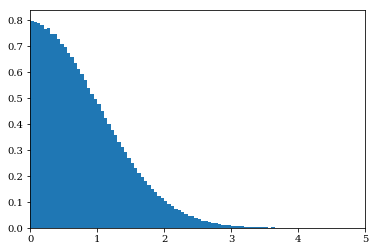

In [11]:
z=Von_Neumann(1000000,1.35)
print("Von Neumann algorithm produced",len(z),"numbers.")
plot_histogram(0.05,0,5,z)

On doit donc générer une distribution gaussienne avec le même nombre de nombres produits par l'algorithme de Von Neumann.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


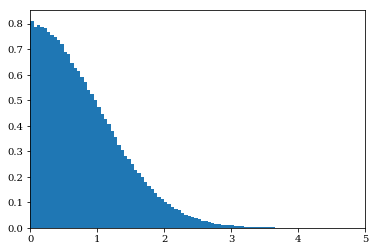

In [12]:
new_gaussian=[] 
for i in range(0,len(z)):
    new_gaussian.append(random.gauss(0,1)) # Distribution gaussienne d'espérance 0 et d'écart-type 1/2.

plot_histogram(0.05,0,5,new_gaussian)

Superposons maintenant les deux distributions. En bleu il s'agit du générateur utilisé en leçon 2 et en orange il s'agit du générateur pré-construit.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


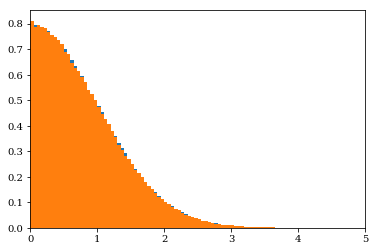

In [13]:
plot_histogram(0.05,0,5,z)
plot_histogram(0.05,0,5,new_gaussian)

La superposition est très bonne.

Bien qu'on ne puisse réellement juger sur la véracité d'une manière ou d'une autre (méthode "built-in generator" ou bien méthode algorithmique) on observe un bon accord entre les deux méthodes. Ces deux méthodes semblent d'ailleurs se confondrent parfaitement lorsque le nombre de points générés tend vers l'infini.

<br>
<br>

2) Afin de simuler une variable aléatoire suivant un certaine distribution de probabilité, on dispose essentiellement de deux algorithmes. Tous deux ont été étudié au cours de la leçon 2. Il s'agit d'une part de <u> la méthode de la fonction inverse</u> et d'autre part de <u> l'algorithme du rejet</u> (algorithme de von Neumann). Le premier nécessite de connaître explicitement l'expression de la fonction cumulative inverse. Le second nécessite de connaitre une distribution de probabilité majorante sur l'intervalle considéré.

Supposons que nous voulions simuler une variable aléatoire suivant une distribution gaussienne de paramètre $\mu$ et $\sigma$ donné. Clairement, on ne peut pas utiliser la méthode de la fonction inverse. Mais on peut utiliser la méthode du rejet en prenant une distribution exponentielle comme distribution majorante.

Dans ce qui suit, on propose une autre méthode afin de simuler une telle variable aléatoire. Il s'agit de <u> l'algorithme de Box-Muller</u>. Expliquons ci-dessous comment il fonctionne.

Soient $X$ et $Y$ deux variables aléatoires indépendantes telles que $X,Y\sim \mathcal{N}(0,1)$ (loi normale centrée réduite). On sait que la distribution conjointe est alors donnée par, $$f_{XY}(x,y)=\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}$$étant le produit de $f_x(x)$ avec $f_y(y)$ (car $X$ et $Y$ sont deux variables aléatoires indépendantes).

Posons maintenant, 

$$\left\{
  \begin{array}{l}
    x=\rho \cos(\theta) \\
    y=\rho \sin(\theta) \\
  \end{array}
\right.$$

Alors, la distribution de probabilité devient, 

$\begin{align}
f_{XY}(x,y)\; dx \; dy & =\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}\; dx\; dy\\
&=\frac{1}{2\pi}e^{-\frac{\rho^2}{2}} \; \rho d\rho \; d\theta \\
&= f_{R\Theta}(\rho,\theta)\; d\rho \; d\theta
\end{align}$

Ceci nous permet d'écrire que,

$$\left\{
  \begin{array}{l}
    \Theta(\theta)=\frac{1}{2\pi} \sim \text{unif[0,2$\pi$]}
    \\
    R(\rho)=\rho e^{-\frac{\rho^2}{2}} \\
  \end{array}
\right.$$

Calculons maintenant la fonction cumulative associée à la variable aléatoire $R$. On a que, 

$\begin{align}
F_R(\rho)&=P(R\leq \rho)=\int_0^{\rho} te^{-\frac{t^2}{2}}\; dt\\
&= 1-e^{-\frac{\rho^2}{2}}
\end{align}$

On reconnaît l'expression de la fonction cumulative d'une distribution exponentielle. On a donc montré par ceci que $R^2\sim \text{exp}(1/2)$, c'est-à-dire que $R$ suit une distribution exponentielle de paramètre 1/2.

On retiendra donc que, 

$$\left\{
  \begin{array}{l}
  R^2\sim \text{exp}(1/2) \\
    \Theta(\theta)\sim \text{unif[0,2$\pi$]} \\
  \end{array}
\right.$$

Le processus itératif s'effectue donc comme suit. Soient $U_1$ et $U_2$ $\sim \text{unif}[0,1]$. Posons,

$$\left\{
  \begin{array}{l}
    R=\sqrt{-2\ln(U_1)}\\
    \Theta=2\pi U_2 \\
  \end{array}
\right.$$

C'est-à-dire que, 

$$\left\{
  \begin{array}{l}
    U_1=e^{-\frac{R^2}{2}}\\
    U_2=\frac{1}{2\pi}\Theta \\
  \end{array}
\right.$$

En posant par la suite,

$$\left\{
  \begin{array}{l}
    X=R \cos(\Theta) \\
    Y=R \sin(\Theta) \\
  \end{array}
\right.$$

On obtient deux variables aléatoires distribuées selon une loi centrée réduite (on pourra au cours de l'implémentation n'en utilisé qu'une des deux).

On pourra encore écrire que $Z=\mu+\sigma X$ afin d'avoir $Z\sim \mathcal{N}(\mu,\sigma^2)$.


Implémentons donc ceci.

In [14]:
def Box_Muller(mu,sigma,N=100000):
    """"
    Function implementing Box-Muller algorithm.
    
    Parameters :
    ------------
    
    N : number of values to simulate. Default value : N=1e5.
    
    mu : mean of the normal distribution to simulate.
    
    sigma : standard deviation (not the variance !) of the normal distribution to simulate.
    
    Returns :
    ---------
    
    histo : an histogram of the distribution simulated.
    
    Z : random variable simulated.
    
    """
    
    U_1=np.random.random_sample(N)
    U_2=np.random.random_sample(N)
    
    R=np.sqrt(-2*np.log(U_1))
    O=2*np.pi*U_2
    
    X=R*np.cos(O)
    
    Z=mu+sigma*X

    return np.array(Z)

Générons à l'aide de cet algorithme une gaussienne de moyenne $\mu=5$ et d'écart-type $\sigma=2$.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


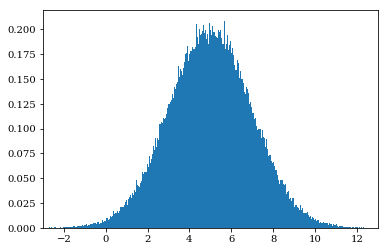

In [15]:
Z=Box_Muller(5,2)
plot_histogram(0.05,-3,13,Z)

A titre de comparaison, on trace l'histogramme correspondant à une gaussienne de mêmes paramètres.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


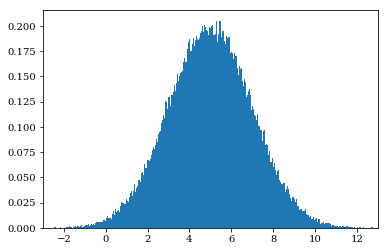

In [16]:
gaussian=[] 
for i in range(0,100000):
    gaussian.append(random.gauss(5,2))

plot_histogram(0.05,-3,13,gaussian)

Et on superpose les deux résultats (en bleu Box-Muller et en orange le générateur pré-construit).

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


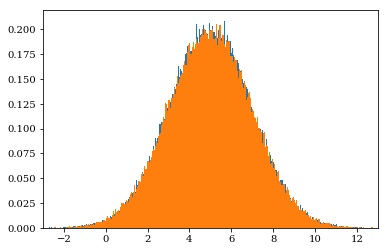

In [17]:
plot_histogram(0.05,-3,13,Z)
plot_histogram(0.05,-3,13,gaussian)

On observe qu'il s'agit bien des mêmes densités de probabilité.

## Leçon 3 : Mouvement brownien

<font color="blue"> <u> Enoncés </u> </font>

<font color="blue">
    
1) Ajouter une contribution au déplacement $dx$ telle que, 


$$dx=c\; dt+\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$$ 


où $c$ est une constante et analyser le comportement de la marche aléatoire. Pouvez-vous deviner les équations correspondantes qui gouvernent l'évolution de la densité $\rho(x,t)$ dans ce cas ? Quelle est la solution pour une distribution gaussienne comme position initiale ?

<br> <br>

2) Simuler maintenant la marche aléatoire avec un terme de "frottement", 


$$dx=-\gamma x \; dt +\sqrt{2\alpha \; dt} \mathcal{N}(0,1)$$ 


Vérifier que la distribution tend bien vers un état stationnaire pour $t\rightarrow \infty$. Pouvez-vous deviner les équations correspondantes qui gouvernent l'évolution de la densité $\rho(x,t)$ dans ce cas ? Quel est la forme analytique de l'état stationnaire ?

<br> <br>
</font>

Avant de se pencher sur ces deux questions, rappelons les points importants du modèle de marche aéatoire construit sur base d'une progression comme, 

$$dx=\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$$ 

Supposons que la position initiale des particules puisse-être modélisée par une gaussienne centré réduite. Pour une telle condition initiale, on peut résoudre l'équation de diffusion, 

$$\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}$$

et trouver la solution analytique, 

$$\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}$$

où $\sigma^2_t = 2\alpha t + \sigma^2$.

Par suite, on peut simuler l'évolution de la position des particules (en 1D en l'occurence) sur un temps de 10 secondes par exemple. On observe alors que chacunes des particules suit une trajectoire très différente, et tendent à se disperser (diffusion).

En regardant la position finale de chacunes des particules à $t=10$ secondes on observe que la gaussienne a été conservée ! En effet l'ensemble des positions finales suivent une distribution gaussienne (de moyenne et d'écart-type différents que la gaussienne de départ forcément).

<br>
<br>

1) On ajoute maintenant une contribution $c\;dt$ au déplacement $dx$ des particules. On a alors que, 

$$dx=c\; dt+\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$$

Essayons qualitativement de discuter les modifications que ce terme induit. 

Notons $dx'=\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$. Il est <i>a priori </i> difficile de comparer les valeurs $dx$ et $dx'$ du problème de part la nature probabiliste de ces quantités. Ce pourquoi on insiste sur la valeur qualitative de ce qui va suivre. 

Soit $X\sim \mathcal{N}(0,1)$. Supposons que l'on simule un grand nombre de valeurs pour $dx$ et $dx'$. Il est alors légitime de penser que la contribution en $\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$ soit approximativement la même pour $dx$ et $dx'$. Or, $dx$ comporte un terme en $c\; dt$ ce qui permet donc d'écrire que pour un grand nombre de simulation, on a que $dx'\leq dx$.

On s'attend donc qualitativement à ce que les particules parcourt en moyenne une plus grande distance à mesure que le temps s'écoule. Ou autrement dit, pour une même valeur de $dt$ la distance parcourue par les particules avant de subir une nouvelle collision sera plus grande.

Un autre aspect à discuter est celui de la vitesse $c$ des particules. Au plus cette vitesse est grande au plus la distance $dx$ parourue par les particules sera importante.

On rappelle ci-dessous, l'aspect de l'évolution des particules (20 d'entres elles) dans le cas où $dx=\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$.

<img src="Evolution.png" width="500">

Implémentons donc ceci et voyons si notre intuition était correcte.

On considère un système constitué de 100 000 particules.

In [18]:
N=100000

On suppose que les positions initiales des particules sont distribuées selon une normale centrée réduite.

In [19]:
x0=np.random.normal(0,1,N)

In [20]:
def B_M_c(c,x0,alpha=2.0,n=20): # B_M for Brownian Motion.
    """
    Describes stochastic evolution of particles position.
    
    Parameters :
    ------------
    
    x0 : initial position.
    
    c : particles evolution speed.
    
    alpha : diffusion coefficient. Default value : alpha=2.
    
    n : number of particles to plot. Default value : n=20.
    
    Returns :
    ---------
    
    x : spatial evolution of particles evolving such as described 
    by the stochastic differential equation. Columns of the matrix 
    are the positions of a single particle.
    
    """

    T=50.0 # Echelle de temps.
    nt=500 # Nombres d'itérations temporelles.
    alpha=2.0 # Coefficient de diffusion.

    dt=T/nt

    t=np.arange(0,T+dt,dt) # Axe temporel discrétisé.
    x=np.empty([nt+1,N]) # On construit une "matrice" de N lignes et de nt+1 colonnes.
        
    x[0]=x0

    for i in range(0,nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        
    
    x_max=[] # Va nous permettre d'ajuster le graphique.
    x_min=[]
    
    fig1=plt.figure(figsize=(10,7.5)) # On intialise une figure matplotlib
    
    for i in range(20):
        plt.plot(t,x[:,i])
        x_max.append(np.max(x[:,i]))
        x_min.append(np.min(x[:,i]))
        
    X_max=np.max(x_max)
    X_min=np.min(x_min)
    
    # Customisation du graphique.

    ax=plt.gca()
    ax.set_title("Evolution de la position de 20 particules")
    ax.set_xlim(0,50)    
    ax.set_ylim(X_min,X_max)
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    plt.xlabel("t")
    plt.ylabel("x")
    
    handles=[mpl_patches.Rectangle((0, 0), 0.5, 1, lw=0, alpha=0.5)] * 1
    
    labels=[]
    labels.append(r"$c$ = {}".format(c))
    ax.legend(handles,labels,facecolor='lightblue',edgecolor="blue")
 
    # On construit maintenant un histogramme des positions finales.
    
    fig2=plt.figure(figsize=(10,7.5))
    
    binwidth=0.5
    bins=np.arange(round(c*T-50),round(c*T+50),binwidth) 
    plt.hist(x[nt],bins,normed=True)
    
    
    # Customisation du graphique.
    
    ax=plt.gca()
    ax.set_title("Histogramme des positions finales")
    ax.xaxis.grid()    
    
    handles=[mpl_patches.Rectangle((0, 0), 0.5, 1, lw=0, alpha=0.5)] * 1
    
    labels=[]
    labels.append(r"$c$ = {0:.4g}".format(c))
    ax.legend(handles,labels,facecolor='lightblue',edgecolor="blue")
    

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


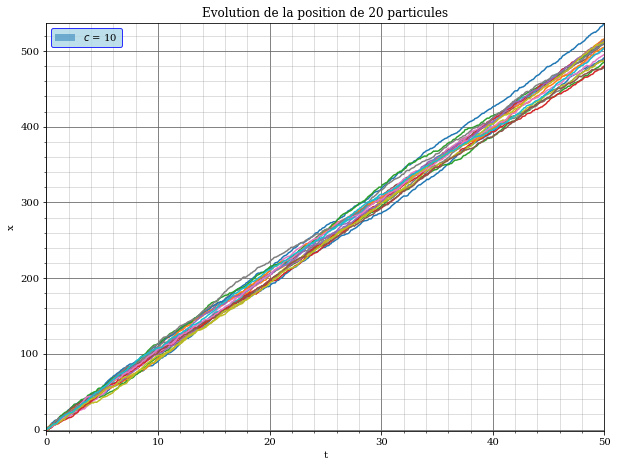

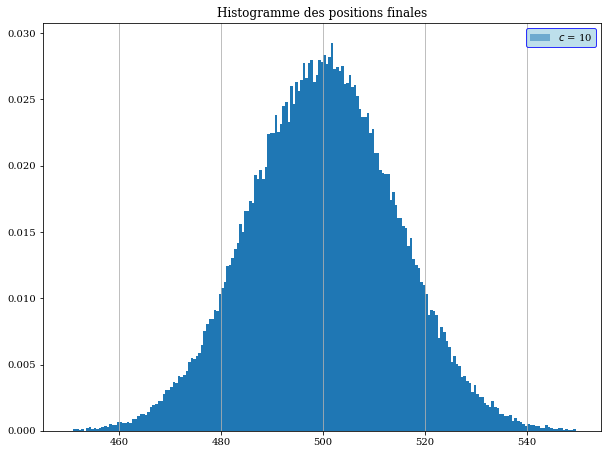

In [21]:
B_M_c(10,x0,alpha=2.0,n=20)

Analysons maintenant les résultats obtenus. On gardera le coefficient de diffusion $\alpha=2$ fixe. Regardons comment évolue la position finale des particules en fonction de la vitesse de propagation $c$.

Pour ce faire, on va distinguer deux régimes. Rappelons que, 

$$dx=c\; dt+\sqrt{2\alpha\; dt} \mathcal{N}(0,1)$$

ou encore que,

$$\frac{dx}{dt}=c+\frac{\sqrt{2\alpha} \mathcal{N}(0,1)}{\sqrt{dt}}$$


On distingue donc deux régimes. Le premier se marque lorsque $\frac{\sqrt{2\alpha} \mathcal{N}(0,1)}{\sqrt{dt}}\ll c$ et le second lorsque $\frac{\sqrt{2\alpha} \mathcal{N}(0,1)}{\sqrt{dt}}\gg c$.

On peut tenter d'évaluer numériquement ces deux régimes.

En effet, on a que $P(-3\leq X \leq 3)\approx 0.9973$, c'est-à-dire que l'on peut considérer, en très bonne approximation, que l'intégralité des valeurs de $\mathcal{N}(0,1)$ sont entre -3 et 3 (en moyenne, pour 100 000 points, seuls 270 points sortiront de cet intervalle). Ceci permet grossièrement d'estimer la rapport suivant,

$$\frac{\sqrt{2\alpha} \mathcal{N}(0,1)}{\sqrt{dt}}\in [-38,38]$$ où on a utilisé le fait que $\alpha=2$ et que $dt=0.1$.

<br>

<u> Premier régime </u>

On a alors ici que $\frac{dx}{dt}=c$. On observe donc une série de trajectoire qui tendent vers des droites de pentes $c$. L'histogramme des positions finales est donc piqué autour d'une certaine valeur.

Ceci correspond au cas où la vitesse de particules est très grande (donc grande énergie cinétique) et que les collisions entre particules dissipent trop peu d'énergie que pour pouvoir modifier significativement l'énergie cinétique des particules et donc leur trajectoire.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


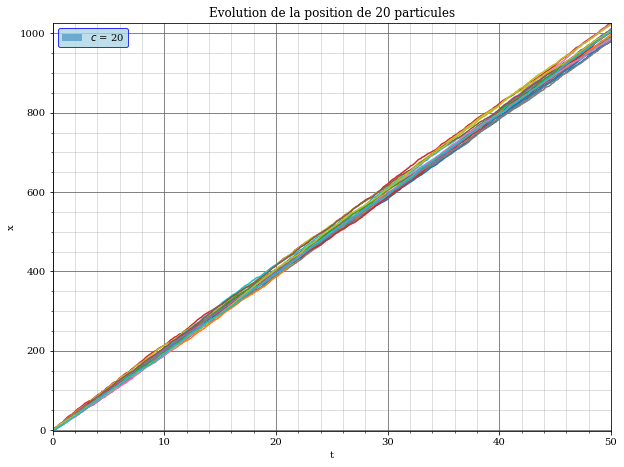

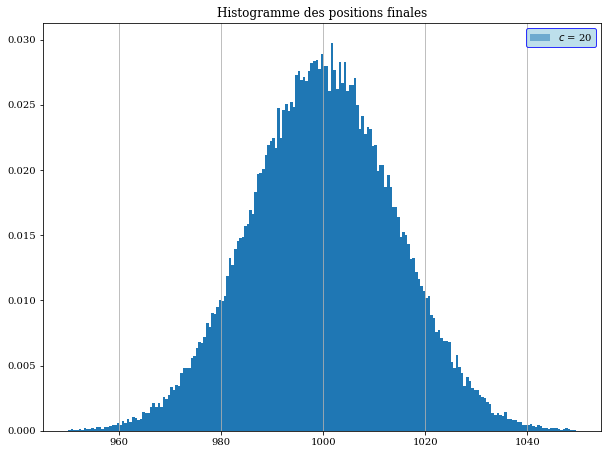

In [22]:
B_M_c(20,x0,alpha=2.0,n=20)

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


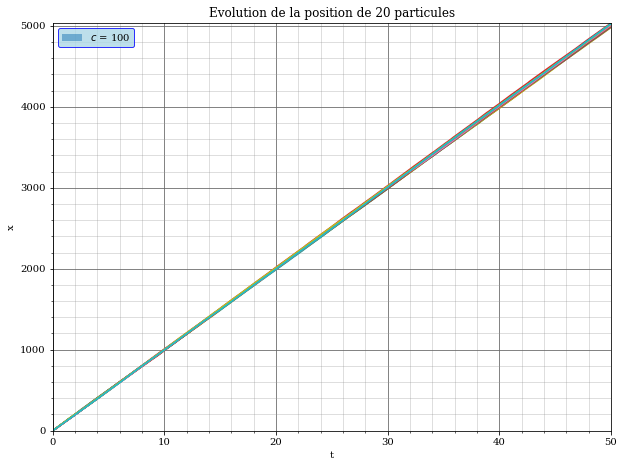

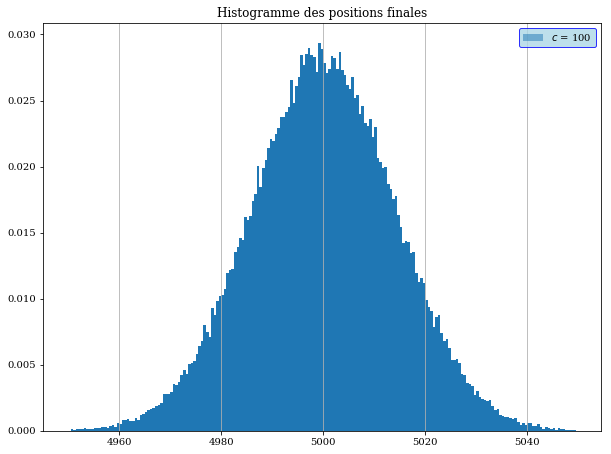

In [23]:
B_M_c(100,x0,alpha=2.0,n=20) # Peut mettre un certains temps à s'exécuter.

<u> Second régime </u>

$c$ devient négligeable devant $\frac{\sqrt{2\alpha} \mathcal{N}(0,1)}{\sqrt{dt}}$. On observe donc un comportement qui s'apparente au cas précédent lorsque l'on considérait que $\frac{dx}{dt}=\frac{\sqrt{2\alpha}}{\sqrt{dt}} \mathcal{N}(0,1)$, la pente n'est donc absolument plus constante. Au plus $c$ est petit, au plus le caractère aléatoire sera notable. Comme déja vu, l'hsitogramme des positions finales sera donné par une gaussienne. Ce cas correspond donc au cas où la vitesse des particules est faible. L'énergie cinétique des particules est donc faible. Les collisions entre particules modifient donc significativement la trajectoire des particules.

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


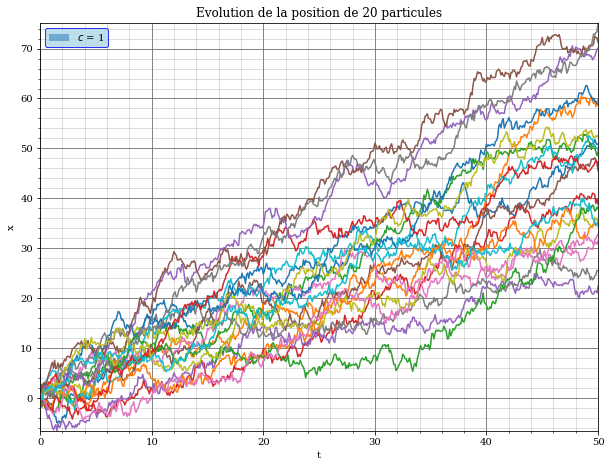

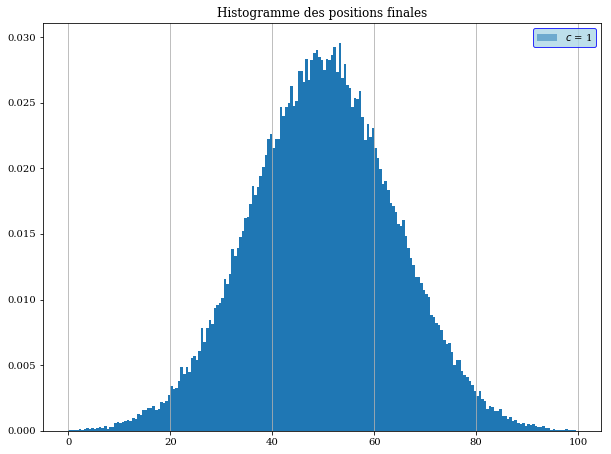

In [24]:
B_M_c(1,x0,alpha=2.0,n=20)

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


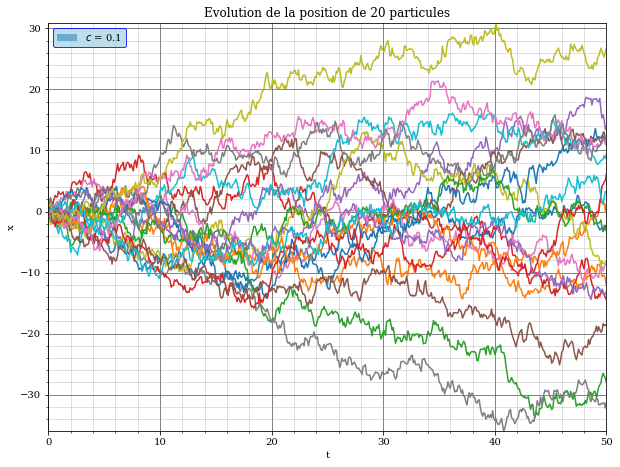

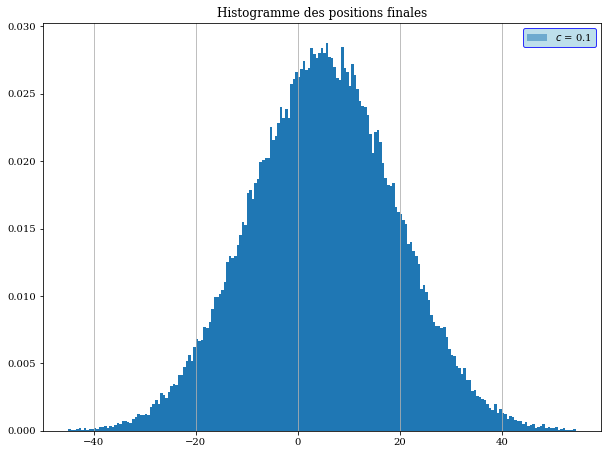

In [25]:
B_M_c(0.1,x0,alpha=2.0,n=20)

Examinons à présent la forme de l'équation différentielle qui gouverne l'évolution de la densité $\rho(x,t)$. Nous proposons l'équation suivante, qui est une équation de convection-diffusion (dans notre cas d'advection-diffusion),

$$\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}-c\frac{\partial \rho}{\partial x}$$

Pourquoi cette équation serait-elle la bonne ? 

Premièrement, elle est dimensionnellement pertinente étant donnée que $[\rho]=\text{m}^{-1}$, $[c]=\text{m.s}^{-1}$ et $[\alpha]=\text{m}^2.\text{s}^{-1}$ de sorte que,

$
\left\{
    \begin{array}{ll}
        \Big[\frac{\partial \rho}{\partial t}\Big]=\text{(m.s)}^{-1} \\
        \Big[c\frac{\partial \rho}{\partial x}\Big]=\text{(m.s)}^{-1}\\
        \Big[\alpha\frac{\partial^2 \rho}{\partial x^2}\Big]=\text{(m.s)}^{-1} \\
    \end{array}
\right.
$

Deuxièmement, cette équation caractérise bien la somme de deux processus en jeu. D'une part le processus de diffusion représensenté par le terme en $\alpha \frac{\partial^2 \rho}{\partial x^2}$. D'autre part, le processus d'advection, désignant le transport des particules de colorant par le mouvement du liquide du système, représenté par le terme en $c\frac{\partial \rho}{\partial x}$. Remarquons la présence du signe négatif devant ce terme car la densité $\rho$ diminue au cours du temps. 

Pour une condition initiale $\rho(x,0)$ qui est une gaussienne centrée réduite, on montre que la solution analytique d'une telle équation est donnée par, 

$$\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-ct)^2}{2\sigma_t^2}}$$

où $\sigma^2_t = 2\alpha t + \sigma^2=2\alpha t + 1$.

On peut utiliser SimPy afin de montrer que cette expression est bien une solution de l'équation d'advection-convection précédente.

In [26]:
sp.init_printing()

On défini les variables que SimPy pourra utiliser comme des symboles.

In [27]:
(alpha, c, t, x) = sp.symbols('alpha c t x')

On défini l'expression de la solution.

In [28]:
solution=(1/sp.sqrt(2*sp.pi*(2*alpha*t+1)))*sp.exp(-(x-c*t)**2/(2*(2*alpha*t+1)))

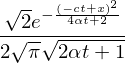

In [29]:
solution

Demandons à SimPy de calculer $\frac{\partial \rho}{\partial t}+c\frac{\partial \rho}{\partial x}-\alpha \frac{\partial^2 \rho}{\partial x^2}$. Cette expression derait d'ailleurs être nulle si notre solution est bien solution de l'équation aux dérivées partielles.

In [30]:
verify=sp.diff(solution,t)+c*sp.diff(solution,x)-alpha*sp.diff(solution,x,x)

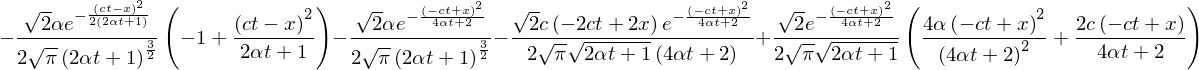

In [31]:
verify

Certes, cette expression n'est pas très amusante à manier, mais on remarque toutefois que le premier terme s'annule avec le troisième, le deuxième s'annule avec l'avant dernier et le quatrième avec le dernier. 

Ainsi, notre solution est bien solution de l'équation aux dérivées partielles considérée.

Pour terminer, remarquons que notre intuition n'était pas si erronée. En effet, avec un terme supplémentaire en $c\; dt$ (pour $c$ suffisamment grand), les particules parcourent en moyenne une distance plus importante que dans le cas où $c=0$. En revanche, il faudrait effectuer une étude supplémentaire quant au fait que les variations des positions des particules par unité de temps sont plus importantes que dans le cas où $c=0$. Nous n'effectuerons pas ici une telle étude.

<br>
<br>

2) On simule maintenant la marche aléatoire avec un terme de frottement tel que, 

$$dx=-\gamma x \; dt +\sqrt{2\alpha \; dt} \mathcal{N}(0,1)$$ 

Comme précédement, tentons de discuter qualitativement l'effet qu'aura ce terme supplémentaire sur les trajectoires des particules.

On part de la relation, $dx=-\gamma x\; dt+\sqrt{2\alpha\;dt}\mathcal{N}(0,1)$ que l'on peut écrire comme $x(t+dt)=(1-\gamma \; dt)x(t)+\sqrt{2\alpha\;dt}\mathcal{N}(0,1)$. 

Dans ce qui suit, on va tenter de discuter le comportement des particules en fonction de la valeur du paramètre $\gamma$. 

Avant tout, notons que pour $\alpha=2$ et $dt=0.1$,

$\begin{align}
\sqrt{2\alpha\;dt}\mathcal{N}(0,1) &=\sqrt{0.4}\mathcal{N}(0,1) \\
& \approx 0.63 \mathcal{N}(0,1) \\
& \in[-0.63\times3.5,0.63\times3.5] \\
& \in [-2.21,2.21] \\
\end{align}$

où on a utilisé le fait que pour $X\sim\mathcal{N}(0,1)$, $P(-3.5\leq X \leq3.5)\approx 0.99954$. Notons que ceci ne reste qu'une approximation. On peut donc numériquement écrire que,

$$x(t+dt)\approx(1-\gamma\; dt)x(t)\pm2.21=(1-0.1\gamma)x(t)\pm2.21$$

On pourra établir une discussion à partir de cette relation. 

On distingue avant tout deux valeurs de $\gamma$ spécifiques. Il s'agit de $\gamma=0$ et de $\gamma=1/dt$. 

- Pour $\gamma=0$, on a que $x(t+dt)=x(t)+\sqrt{2\alpha\;dt}\mathcal{N}(0,1)\approx x(t) \pm 2.21$. On se réduit alors au cas <i>classique</i> déjà étudié au cours de la leçon 3. L'évolution caractéristique est alors illustrée sur l'image ci-dessus en début d'exercice.

<br>

- Pour $\gamma=1/dt=10$, on a alors que $x(t+dt)=\sqrt{2\alpha\;dt}\mathcal{N}(0,1)\approx \pm 2.21$. Le mouvement de la particule sera alors borné par $x(t)=\pm 2.21$. La progression de la particule ne dépend absolument plus de son avancement antérieure. Notons que l'on pourra toujours avoir une particule qui dépassera cette borne car on a que $P((X\leq-3.5)\cap(3.5\leq X))\approx 1-0.99954=0.00046$ pour $X\sim\mathcal{N}(0,1)$. On s'attend donc à ce qu'approximativement 46 particules sur $100\;000$ dépasse la borne $x(t)\pm2.21$.

Regardons ce qui se passe lorsque $\gamma$ est localisé entre ces deux régimes et au-delà de ces régimes.

- Pour $0<\gamma<1/dt$, on a que $0<1-\gamma\;dt<1$. Ecrivons que $\zeta=1-\gamma\;dt=\text{cste}$. On peut alors écrire l'équation de la progression comme, $x(t+dt)=\zeta \; x(t)+ \sqrt{2\alpha\;dt}\mathcal{N}(0,1)\approx \zeta \; x(t)\pm 2.21$<br> <br>Supposons qu'il existe une particule <i>fictive</i> qui vérifie $x(t+dt)=\zeta \; x(t)+ 2.21$. La particule peut alors bien être condidérée de fictive car ce comportement est infiniment peu probable. Après un grand nombre d'itérations ($t \rightarrow \infty$), on aurait alors que $x(t+dt)\approx x(t)=x_{\infty}$. Ainsi, on aurait que, $$x_{\infty}=\frac{2.21}{1-\zeta}=\frac{2.21}{\gamma \;dt}=\frac{2.21}{0.1\gamma}$$Ainsi $x(t)=\pm x_{\infty}$ constituerait une borne à la position des particules.

On voit donc que dans le cas où $\gamma\rightarrow 10$, $x_{\infty}\rightarrow \pm 2.21$ comme prédit ci-dessus. Pour $\gamma \rightarrow0$, $x_{\infty}\rightarrow \pm \infty$ et ce dans un cas infini d'itérations. En pratique, on observera qu'au plus le nombre d'itérations est important, au plus il y aura de particules dont la position $x(t)$ sera grande. 

On insiste à nouveau sur le fait qu'un certain nombre de particules pouront dépasser cette borne. On devrait donc plutôt dire que la tendance générale des particules est d'être borné par $\pm x_{\infty}$.

<br>

- Pour $\gamma$<0, on a que $\zeta>1$. Dans ce cas, on peut écrire $x(t+dt)\approx \zeta \; x(t)\pm 2.21$ sous la forme d'une suite $U_{n+1}=\zeta \; U_n\pm 2.21$ où $U_n=x(t_0+n\; dt)$. Une telle suite ne convergera pas. Dans ce cas, le mouvement des particules divergera.

<br>

- Le dernier cas est celui pour lequel $\gamma>1/dt$, cest-à-dire pour $\zeta<0$. Ici, il nous faut discuter deux sous-cas. Il y a d'abord le cas où $-1<\zeta<0$. Dans ce cas, la suite introduite au point précédent est bornée et ne converge pas pour autant. On peut trouver la valeur de ces bornes en effectuant le raisonnement suivant. On fixe $\zeta$ tel que $-1<\zeta<0$. Prenons une condition initiale $x(0)=\mathcal{N}(0,1)=\chi_0$. Supposons que $\chi_0>0$. Alors, $x(1)=\zeta \chi_0-2.21=\chi_1$ est la distance maximale possible car le produit $\zeta \chi_0$ est de signe négatif. $x(2)=\zeta \chi_1+2.21$ est la distance maximale car le produit $\zeta \chi_1$ est positif. Et ainsi de suite en alternant les signes + et -.

    La suite considérée est donc,
    
    $U_{n+1}=\left\{
    \begin{array}{ll}
        \zeta U_n+(-1)^{n+1}\times 2.21 & \text{si} \; U_0>0\\
        \zeta U_n+(-1)^n\times 2.21 & \text{si}  \; U_0<0\\
     \end{array}
\right.$

    On peut néanmoins simuler ce qui se passe pour une condition initiale <i>limite</i>, c'est-à-dire pour $U_0=\pm3.5$ et disons pour $\gamma=19 \; \Leftrightarrow \; \zeta=-0.9$. On trouve numériquement que les bornes sont $\pm22.1$ et ce indépendamment de la condition initiale choisie. <br> <br>
    L'autre cas est le cas où $\zeta<-1$, c'est-à-dire pour $\gamma>2/dt$, le mouvement des particules diverge complètement. La <i>vitesse</i> de divergence n'est pas constante et pourra varier d'une particule à l'autre. Ceci dépend des conditions initiales.

    Finalement, notons que pour $\gamma=2/dt$, on ne peut non plus raisonner en terme de particule fictive. En effet, la particule qui aura parcouru le plus de distance n'est pas celle qui vérifiera toujours (et ce à cause du signe négatif devant $x(t)$) que $x(t+dt)\approx  -2x(t)- 2.21$ par exemple. Ce cas est donc purement aléatoire (voire chaotique).

<br>

Récapitulons toutes nos conjectures.

$\left\{
    \begin{array}{rl}
        \gamma<0 &: \text{Mouvement des particules qui diverge}\\
        \gamma=0&: \text{Réduction au cas classique}\\
        0<\gamma<1/dt &: \text{Mouvement de la plupart des particules borné par} \pm \frac{2.21}{\gamma \; dt}\\
        \gamma=1/dt &: \text{Mouvement de la plupart des particules borné par } \pm 2.21\\
        1/dt<\gamma<2/dt &: \text{Mouvement des particules borné par} \pm22.1 \\
        \gamma=2/dt &: \text{Mouvement très aléatoire}\\
        2/dt<\gamma &: \text{Mouvement des particules qui diverge}
     \end{array}
\right.$

On insiste encore une fois sur le fait que lorsqu'on dit que le mouvement des particules est borné, on sous-entend que c'est la plupart des particules qui verront leur mouvement borné ! En effet, $P(-3.5\leq X \leq3.5)\approx 0.99954\neq 1$ ! Notons aussi que ces bornes sont en fin de compte assez bonne car on simule notre système avec $100\;000$ particules de sorte que plus au moins 46 d'entres elle devraient êtres en dehors de ces bornes. 

Vérifions à présent si nos conjectures sont correctes.


In [32]:
def B_M_gamma(gamma,x0,alpha=2.0,n=20,T=50,display=1): # B_M for Brownian Motion.
    """
    Describes stochastic evolution of particles position.
    
    Parameters :
    ------------
    
    x0 : initial position.
    
    gamma : friction coefficient.
    
    alpha : diffusion coefficient. Default value : alpha=2.
    
    n : number of particles to plot. Default value : n=20.
    
    T : time scale.
    
    display : allows the user to not display all the graphs (it is going to be more useful later)
    
    Returns :
    ---------
    
    x : spatial evolution of particles evolving such as described 
    by the stochastic differential equation. Columns of the matrix 
    are the positions of a single particle.
    
    """

    nt=10*T # Nombres d'itérations temporelles.
    alpha=2.0 # Coefficient de diffusion.

    dt=T/nt

    t=np.arange(0,T+dt,dt) # Axe temporel discrétisé.
    x=np.empty([nt+1,N]) # On construit une "matrice" de N lignes et de nt+1 colonnes.
        
    x[0]=x0

    for i in range(0,nt):
        x[i+1]=(1-gamma*dt)*x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        
    
    x_max=[] # Va nous permettre d'ajuster le graphique.
    x_min=[]
    
    fig1=plt.figure(figsize=(10,7.5)) # On intialise une figure matplotlib

    
    for i in range(20):
        plt.plot(t,x[:,i])
        x_max.append(np.max(x[:,i]))
        x_min.append(np.min(x[:,i]))
        
    X_max=np.max(x_max)
    X_min=np.min(x_min)

    ax=plt.gca()
    ax.set_title("Evolution de la position de {0:.4g} particules".format(n))
    ax.set_xlim(0,T)    
    ax.set_ylim(X_min,X_max)
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    plt.xlabel("t")
    plt.ylabel("x")
    
    handles=[mpl_patches.Rectangle((0, 0), 1, 1, lw=0, alpha=0.5)] * 2
    
    labels=[]
    labels.append(r"$\gamma$ = {0:.4g}".format(gamma))
    labels.append(r"$\alpha$ = {0:.4g}".format(alpha))   
    ax.legend(handles,labels,facecolor='lightblue',edgecolor="blue")
 
    # On construit maintenant un histogramme des positions finales.
    
    fig2=plt.figure(figsize=(10,7.5))
    
    binwidth=0.05
    bins=np.arange(X_min,X_max,binwidth) 
    plt.hist(x[nt],bins,normed=True)
    
    ax=plt.gca()
    ax.set_title("Histogramme des positions finales")
    ax.xaxis.grid()  
    
    handles=[mpl_patches.Rectangle((0, 0), 1, 1, lw=0, alpha=0.5)] * 2
    
    labels=[]
    labels.append(r"$\gamma$ = {0:.4g}".format(gamma))
    labels.append(r"$\alpha$ = {0:.4g}".format(alpha))   
    ax.legend(handles,labels,facecolor='lightblue',edgecolor="blue")
    
    if display==0:
        plt.close(fig1)
        plt.close(fig2)
    
    return np.array(x)

<font color="orange"> $\gamma<0$. </font>

<font color='red'> Attention, l'exécution de la cellule ci-dessous prend un peu de temps ! </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


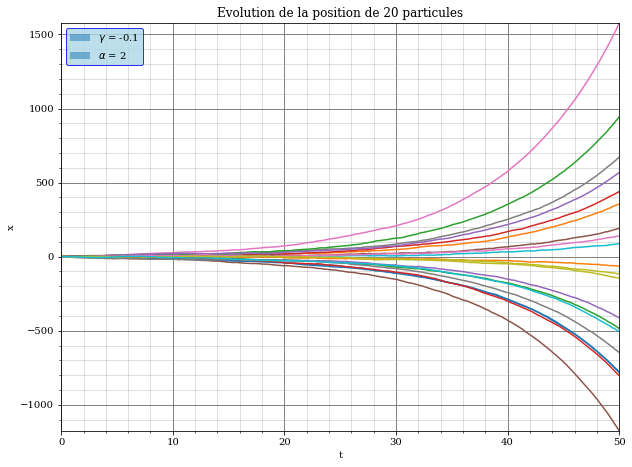

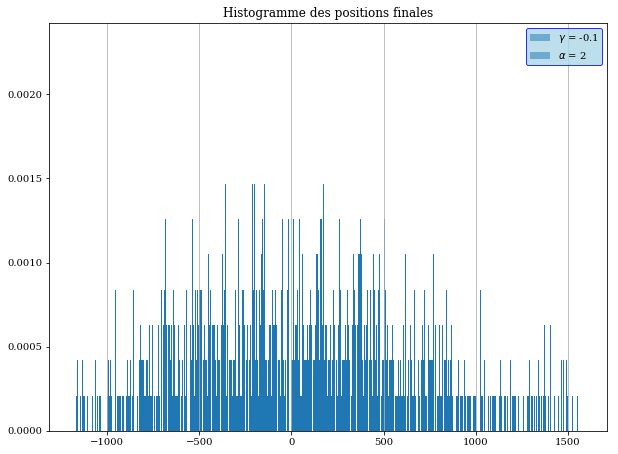

In [33]:
position=B_M_gamma(-0.1,x0,alpha=2.0,n=20)

La position des particules diverge bien. L'histogramme est constitué d'un ensemble de delta de Dirac.

<br>

Le cas où <font color="orange"> $\gamma=0$ </font> est trivial. Pas besoin de l'illustrer.

<br>

<font color="orange"> $0<\gamma<1/dt \; \Leftrightarrow \; 0<\gamma<10$. </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Position minimale : -4.215377055147248
Position maximale : 4.352491304486578


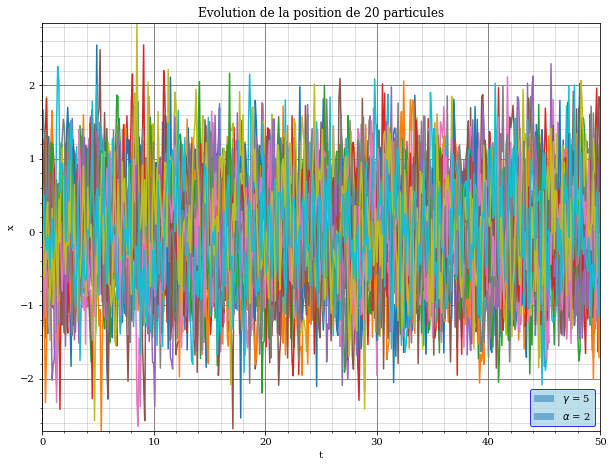

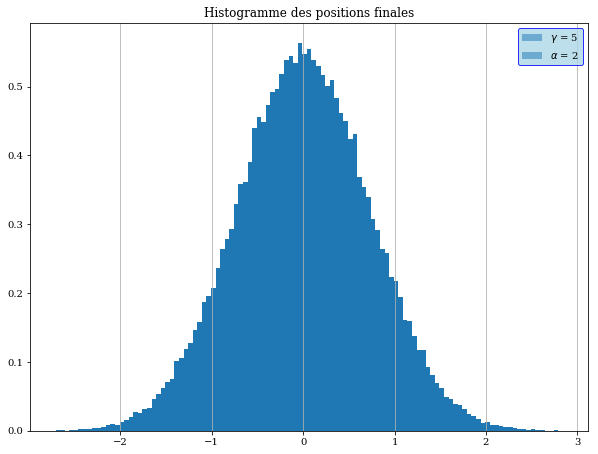

In [34]:
position=B_M_gamma(5,x0,alpha=2.0,n=20)
print("Position minimale :",np.min(position))
print("Position maximale :",np.max(position))

Il est ici difficile de vérifier le comportement attendu à partir des deux graphiques précédents. En revanche, en recherchant le minimum et le maximum des positions, on voit qu'ils vérifient bien notre conjecture. Les points sont bien borné par, $$\pm \frac{2.21}{\gamma \; dt}=\pm \frac{2.21}{0.5}=\pm 4.42$$


<br>
<font color="orange"> $\gamma=1/dt=10$ </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


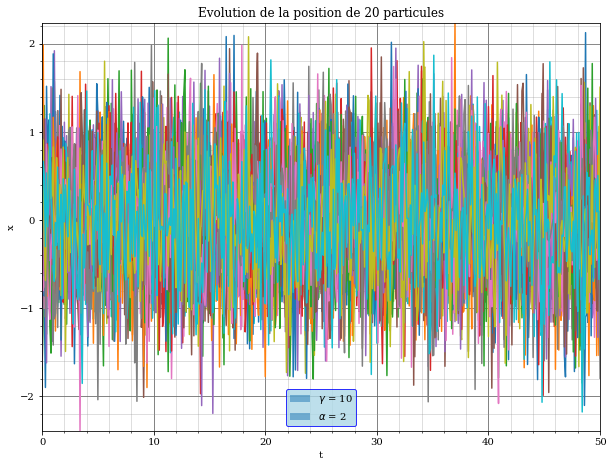

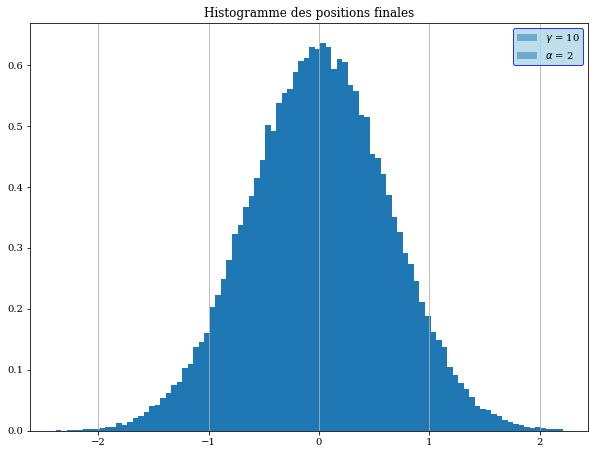

In [35]:
position=B_M_gamma(10,x0,alpha=2.0,n=20)

Cette fois-ci, c'est l'histogramme qui confirme notre conjecture.

<br>

<font color="orange"> $1/dt<\gamma<2/dt \; \Leftrightarrow \; 10<\gamma<20$ </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Position minimale : -8.317011580056814
Position maximale : 7.775815443403315


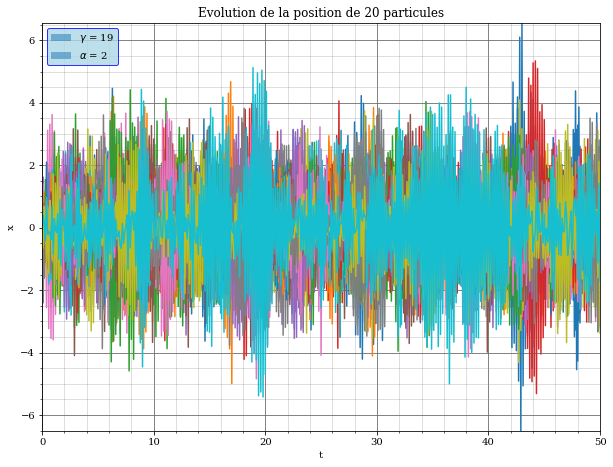

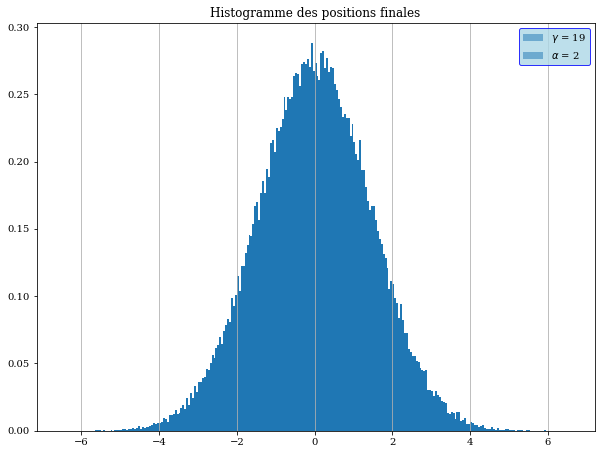

In [36]:
position=B_M_gamma(19,x0,alpha=2.0,n=20)
print("Position minimale :",np.min(position))
print("Position maximale :",np.max(position))

Ici, notre conjecture est difficilement vérifiable. Notre valeur de borne semble être largement surestimée. Il est vrai qu'il est extrêmement peu probable d'avoir une particule qui vérifie l'évolution de la suite numérique explicitée précédemment pour ce cas. Notons cependant qu'au plus on augmente la valeur de $N$, le nombre de particules simulées, au plus la position maximale et minimale augmentent. Pour $N\rightarrow \infty$, on pense que les bornes $\pm 22.1$ doivent êtres atteintes.

<br>

<font color="orange"> $\gamma=2/dt=20$ </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


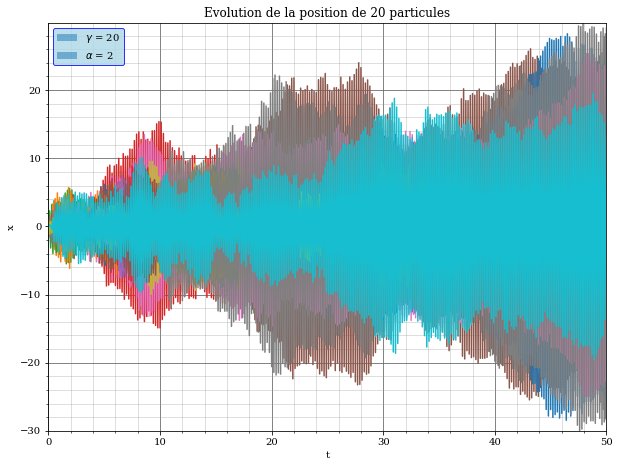

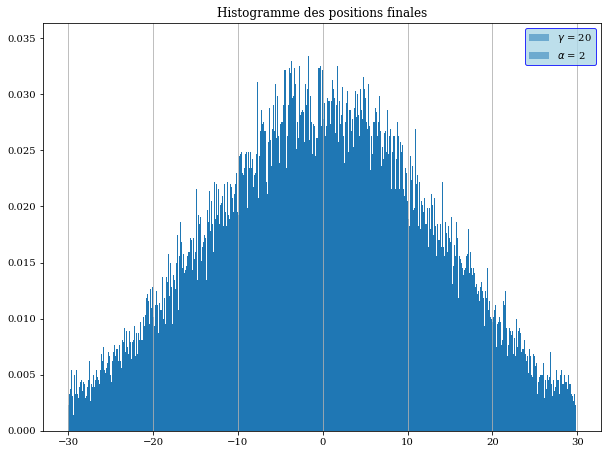

In [37]:
position=B_M_gamma(20,x0,alpha=2.0,n=20)

Le mouvement est bien très aléatoire, comme conjecturé.

<br>

<font color="orange"> $2/dt<\gamma \; \Leftrightarrow \; 20<\gamma$ </font>

<font color='red'> Attention, l'exécution de la cellule ci-dessous prend un peu de temps ! </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


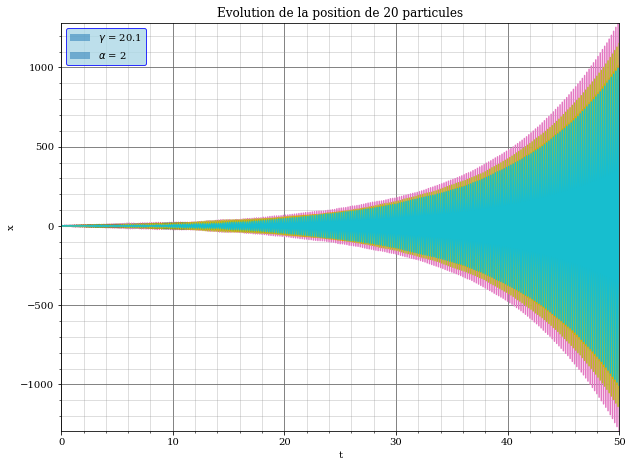

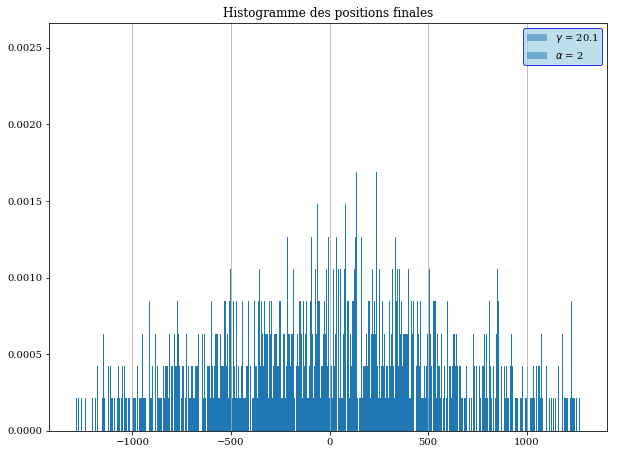

In [38]:
position=B_M_gamma(20.1,x0,alpha=2.0,n=20)

On observe donc bien que la trajectoire des particules diverge.

<br>

Ainsi, notre conjecture s'est avéré assez correcte.

Remarquons que pour $0<\gamma<20$, les positions finales des particules sont distribuées selon une gaussienne centrées en 0. Ainsi, le facteur $\gamma$ ne fait que modifier l'écart-type, il n'y a pas de mouvement de <i>drift</i> comme dans le cas précédent, la moyenne des gaussiennes restant toujours la même.

Que se passe-t-il pour de plus grandes valeurs de $t$ ? Afin d'observer le comportement, on va construire une fonction qui, étant donné une valeur de $\gamma$ telle que $0<\gamma<20$, va tracer les gaussiennes définies à partir des histogrammes des positions finales pour des valeurs différentes de $t_{\text{finale}}$. Pour ce faire, on utilisera la bibliothèque Seaborn qui possède une fonction intéressante : fitter une gaussienne sur un histogramme.

In [39]:
def histogram_time_scale(gamma,T_initial,T_final,dT):
    """
    
    Gives a gaussian fitting for particules last positions for different time scale.
    
    Parameters:
    -----------
    
    gamma : friction coefficient.
    
    T_initial : initial maximum of time scale.
    
    T_final : final maximum of time scale.
    
    dT : time scale step
    
    """
    
    t=T_initial
    x0=np.random.normal(0,1,N)
    z=[]
    
    while t<=T_final:
        
        position=B_M_gamma(gamma,x0,alpha=2.0,n=20,T=t,display=0) # display parameter gets useful here.
        z.append(position[10*t])
        t=t+dT
        
    binwidth=0.05
    bins=np.arange(-5,5,binwidth)
    fig=plt.subplots(figsize=(10,7.5))
    
    ax=plt.gca()
    ax.set_title("Gaussiennes des positions finales pour différentes valeurs de T")
    ax.xaxis.grid()  
    
    for i in range(0,len(z)):
        x=T_initial+i*dT
        sbn.distplot(z[i],bins,hist=False,kde=True,label="T = {0:.4g}".format(x))
        

<font color='red'> Attention, l'exécution de la cellule ci-dessous prend un peu de temps ! </font>

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes

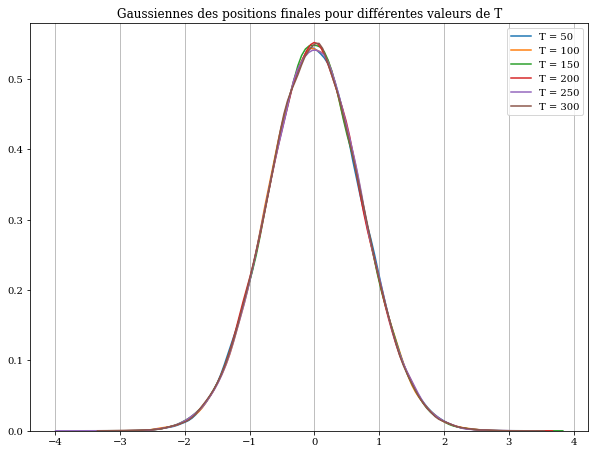

In [40]:
histogram_time_scale(5,50,300,50)

On observe clairement que l'échelle temporelle n'a plus d'influence sur le profil des gaussiennes. Elles sont presque toutes identiques. Une plus grande échelle temporelle n'est pas synonyme d'une gaussienne définie. Ceci signifie donc que le système atteint un état stationnaire qui n'évolue plus dans le temps.

<br>

Nous n'avons en revanche pas trouver l'équation différentielle donnant $\rho(x,t)$ ni l'expression de la solution bien que la solution attendu est une gaussienne pour $0<\gamma<20$. Nos recherches nous ont toutefois menées vers l'équation de Langevin et la dynamique qu'elle induit.

(cf. https://fr.wikipedia.org/wiki/Dynamique_de_Langevin).

## Leçon 4 : Modèle d'Ising

<font color="blue"> <u> Enoncés </u> </font>

<font color="blue">
    
1) Vérifier que l'algorithme de Metropolis donne les proportions correctes d'états "up" et "down" pour différentes configuration de réseau.
<br> <br>

2) Effectuer une série de lancement pour des valeurs différentes de $\alpha \in [0,1]$ et représenter sur un graphique l'évolution de la magnétisation et de l'énergie moyenne. Estimer la valeur de $\alpha$ pour laquelle une transition de phase semble se produire. Est-ce compatible avec la solution exacte d'Onsager pour le système ?
<br> <br>

3) Effectuer à nouveau l'analyse avec de nouvelles conditions aux limites et une configuration de réseau initiale différente. Par exemple, on pourra supposer que les spins des atomes du bord sont "up" alors que les spins au sein même du réseau sont distribués de manière aléatoire.

<br> <br>
</font>

<br> <br>

1) On vérifie ici que l'algorithme de Metropolis donne les proportions correctes d'états <i>up</i> et <i>down</i>. C'est-à-dire que pour la donnée d'un spin localisé à certaines coordonnées données, on souhaite vérifier que le rapport entre la probabilité relative que ce spin soit <i>up</i> et la probabilité qu'il soit <i>down</i> soit bien donnée par, 

$$\frac{p(\text{up})}{p(\text{down})}=e^{-\Delta E}$$

Pour ce faire, on va générer des états initiaux aléatoires sur une grille 10$\times$10. Chaque point de la grille correspond alors à un état de spin. On choisi un spin localisé à un endroit donné. On regarde la configuration de ce spin qui minimise l'énergie du système et on défini les conditions d'inversion de ce spin. On génère alors une grande quantité d'états différents pour ce spin et on calcule le rapport entre le nombre de spins <i>up</i> et <i>down</i>.

La routine suivante permet de générer un état intial aléatoire sur une grille de taille donnée.

In [41]:
def initial_state(nx,ny):
    """
    Creates a lattice with random spin orientations.
   
    Parameters:
    -----------
    
    nx : discretization points in x.
    
    ny : discretization points in y.
   
    Returns:
    --------
    
    r : 2D array of spins
    
    """ 
    r = np.random.randint(0,2,(nx,ny)) # On génère une "matrice" de taille nx x ny constituée de 0 et 1. Les 0 et 1 sont 
    # distribués selon une distribution uniforme.
    
    r[r==0] =-1 # On assimile les 0 à un état de spin inversé.

    return r

Construisons maintenant une routine qui étant donné un spin à un endroit donné, calcule l'énergie associée à l'interaction de ce spin avec ses autres spins voisins.

In [42]:
def energy_at_site(sp,alpha,ix,iy,sigma):
    """ 
    Computes the contribution to the energy for a given spin at location ix,iy for a lattice with periodic boundary conditions.
   
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    alpha : coupling constant.
    
    ix : location in x.
    
    iy : location in y.
    
    sigma : spin at site ix,iy.
    
    Returns:
    --------
    
    energy : energy for the given configuration.
    
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    # Modulus to apply periodicity to the system.
    
    return energy


Construisons maintenant une routine qui se charge d'inverser le spin sous certaines conditions. L'idée est que si l'inversion du spin $s_i$ diminue l'énergie du système, alors on garde ce spin inversé. En revanche, si l'inversion provoque une augmentation de l'énergie, on garde le spin inversé avec une probabilité de $e^{-\Delta E}$.

Cet algorithme porte le nom d'algorithme de Metropolis.

In [43]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ 
    Flips spin at site (ix,iy) when probability condition is met.
   
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    alpha : coupling constant.
    
    ix : location in x.
    
    iy : location in y.
    
    """
    sigma=sp[ix,iy]
    energy_before_flip=energy_at_site(sp,alpha,ix,iy,sigma)
    energy_if_site_flipped=energy_at_site(sp,alpha,ix,iy,-sigma)
    
    a=np.random.random_sample()
    b=np.exp(-(energy_if_site_flipped-energy_before_flip))
    
    if (a<b): # Cette condition est toujours satisfaite si dE<0.
        sp[ix,iy]=-sp[ix,iy]
    

A partir des routines précédentes, on crée une fonction qui nous donnera directement la variation d'énergie, la probabilité statistique attendue et la probabilité obtenue à partir de l'algorithme de Metropolis, étant donné un couple de coordonnées $(x,y)\in[0,10]^2$ et une valeur de la constante de couplage adimensionnelle $\alpha$.

In [44]:
def Metropolis_test(alpha,ix,iy,N):
    """
    Verify that the Metropolis algorithm gives the correct ratio of spin ups and donws for different initial configuration.
    
    Parameters:
    -----------
    
    alpha : coupling constant.
    
    ix : location in x.
    
    iy : location in y.
    
    N : number of times Metroplis algorithm is being applied.
    
    """
    sp=initial_state(10,10)
    print("Initial configuration is :")
    print(sp)
    sigma=sp[ix,iy]

    energy=energy_at_site(sp,alpha,ix,iy,sigma)
    print("Energy at site (",ix,",",iy,") is",energy,".")
    
    inverted_energy=-energy_at_site(sp,alpha,ix,iy,sigma)
    print("If spin at site (",ix,",",iy,") is inverted, then the energy is", inverted_energy,".")
    
    delta_energy=inverted_energy-energy
    z=np.exp(-delta_energy)
    
    if z>=1:
        e=1/z
        print("Thus, expected ratio is",e,".")
    
    if z<1:
        print("Thus, expected ratio is",z,".")
    
    states=np.empty(N+1)
    states[0]=sp[ix,iy]
    
    for n in range(0,N):
        metropolis_at_site(sp,alpha,ix,iy)
        states[n]=sp[ix,iy]
        
    ups=np.extract(states==1, states).size
    print("Number of spins up",ups)
    downs=N-ups
    print("Number of spins down",downs)
    
    if delta_energy<0 and sigma==1: # On discute au cas par cas.
        computed_ratio=ups/downs
        print("Computed ratio is",computed_ratio,".")
        
    if delta_energy>0 and sigma==1:     
        computed_ratio=downs/ups
        print("Computed ratio is",computed_ratio,".")
        
    if delta_energy<0 and sigma==-1:
        computed_ratio=downs/ups
        print("Computed ratio is",computed_ratio,".")
        
    if delta_energy>0 and sigma==-1:
        computed_ratio=ups/downs
        print("Computed ratio is",computed_ratio,".")
        

On choisit donc une valeur pour $\alpha$, disons 1/2. 

On choisit aussi un couple de coordonnées arbitraire, disons $(2,3)$.

In [45]:
nx=10
ny=10

In [46]:
Metropolis_test(0.5,2,3,100000)

Initial configuration is :
[[-1 -1 -1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1  1  1  1  1  1  1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1  1 -1]
 [ 1 -1  1  1  1 -1 -1  1  1  1]
 [ 1 -1  1 -1 -1 -1 -1 -1  1 -1]
 [-1  1  1 -1 -1  1 -1  1 -1  1]
 [-1 -1  1  1  1 -1  1  1 -1  1]
 [ 1  1 -1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1  1 -1 -1  1]
 [-1 -1  1  1 -1  1 -1  1 -1 -1]]
Energy at site ( 2 , 3 ) is 1.0 .
If spin at site ( 2 , 3 ) is inverted, then the energy is -1.0 .
Thus, expected ratio is 0.1353352832366127 .
Number of spins up 88004
Number of spins down 11996
Computed ratio is 0.13631198581882642 .


Le rapport calculé est donc proche du rapport théorique. Au plus on applique l'algorithe de Metropolis, au plus les deux rapports coïncident.

<br>
<br>

2) L'objectif dans ce qui suit est de trouver la température de transition de phase $T_c$ du matériau ferromagnétique considéré. Pour $T<T_c$, le matériau possède une magnétisation non-nulle, les moments-magnétiques (spin) sont alors tous alignés. Pour $T>T_c$, le matériau n'est plus magnétisé, les dipôles magnétiques sont complètement désorganisés.

Le matériau en question est univoquement déterminé par la valeur du paramètre $J$ dans $\alpha=\frac{J}{k_B T}$.

On supposera que la matériau est initialement magnétisé et que tous ses moments magnétiques pointent dans la même direction (<i>up</i> ou <i>down</i>).

On construit donc une fonction qui étant donné une telle configuration de spins va "switcher" les spins de manière aléatoire si les conditions demandées par l'algorithme de Metropolis sont requises.

In [47]:
def ising_model(sp,alpha,N,nx,ny):
    """
    Creates a sequence of states for the Ising model using the Metropolis algorithm.
    
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    alpha : coupling constant.
    
    N : number of states to create.
    
    nx: :discretization points in x.
    
    ny : discretization points in y.
    
    Returns:
    --------
    
    states: sequence of states.
    
    """
    states=np.empty([N+1,nx,ny])
    states[0]=sp.copy()
    
    for i in range(1,N+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states
    

On s'intéresse maintenant à la magnétisation moyenne de notre matériau. Pour rappel, la magnétisation moyenne est définie par,

$$<M> = \frac{\sum_k M_k}{N_k}$$

Pour ce faire, il nous faut sommer l'entièreté des spins pour chacun des $N$ états que l'on a généré à partir de l'algorithe de Metropolis. On reporte par la suite l'évolution de cette magnétisation moyenne sur un graphique. On fait varier le paramètre $\alpha$ de 0 à 1.

Construisons donc une routine qui s'occupe de faire la somme de nos états de spin.

In [48]:
def sommation(states,N):
    """
    Gives sum of elements of a given array.
    
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    state : array used to compute sum of elements.
    
    N : number of sub-array in state.
    
    Returns:
    --------
    
    x : array including values of the sum for each N states.
    
    """
    x=np.empty(N)
    for i in range(0,N):
        x[i]=np.sum(states[i])
        
    return x

On construit maintenant une fonction qui va faire varier le paramètre $\alpha$ entre 0 et 1. L'évolution du nombre de spin pour chacunes des valeurs de $\alpha$ sera illustrée par une représentation graphique.

In [49]:
def mean_magnetisation_alpha(sp,N,d_alpha,nx,ny):
    """
    Plots the evolution of the mean energy observed in the system for each value of alpha.
    
    Parameters:
    -----------
    
    N : number of states to look at.
    
    d_alpha : variation of alpha.
    
    nx: :discretization points in x.
    
    ny : discretization points in y.
    
    """
    
    fig=plt.figure(figsize=(10,7.5)) # On initialise une figure Matplotib.
    
    alpha=d_alpha

    initial_state=sp
    
    while alpha<=1:
        
        initial_state=np.copy(sp)
        
        sample_system=[] # On initialise toutes les listes.
        sigma=[]
        
        sample_system=ising_model(initial_state,alpha,N,nx,ny) # On génère N différents états du système par l'algorithme de Metropolis.
        sigma=sommation(sample_system,N) # Calcule la magnétisation totale pour le système k (0<=k<=N).
        
        z=sum(sigma)/(nx*N) # Calcule la magnétisation moyenne.
        
        plt.scatter(alpha,z,s=20,c='c',marker='o') # On trace <M> en fonction de alpha.
        
        print(alpha)

        alpha=alpha+d_alpha
        
    # Customisation du graphique.
    
    ax=plt.gca()
    ax.set_title(r"Magnétisation moyenne du système en fonction de $\alpha$")
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$<M>$")

<font color='red'> Attention, l'exécution de la cellule ci-dessous prend un peu de temps ! </font> (On affiche la valeur du paramètre $0\leq \alpha \leq 1$ pour les itérations successives).

In [50]:
nx=ny=100
N=100
sp=np.ones([nx,ny])

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

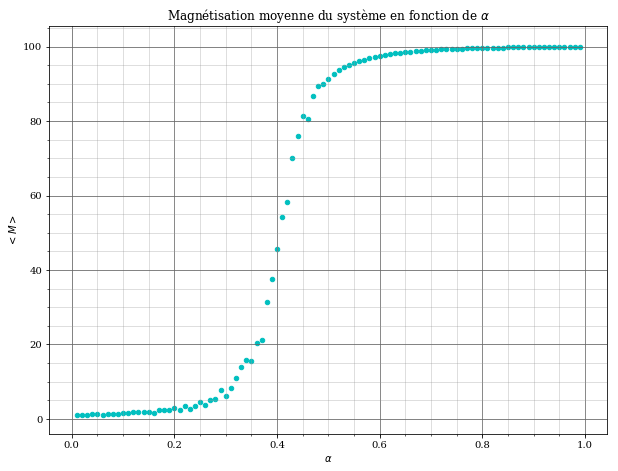

In [51]:
mean_magnetisation_alpha(sp,N,0.01,nx,ny)

<b>Remarque :</b> dans ce qui suit on s'est arrangé à normaliser le graphe de la magnétisation moyenne de sorte que la magnétisation moyenne soit comprise entre 0 et 100.

Penchons-nous maintenant sur l'évolution de l'énergie moyenne. Pour rappel, on défini l'énergie moyenne du système comme, 

$$ <E> = \frac{\sum_k E_k}{N_k}\\ $$

où $E_k$ est l'énergie totale du système $k$. 

On a donc que 

$$E_k=-\alpha \sum_{\text{paires}\;(i,j)} s_i s_j$$

où l'énergie est exprimée en unités de $k_B T$.

Comment allons-nous effectuer cette somme sur toutes les paires $(i,j)$ ? Pour rappel, on se place sur une grille de taille $100\times100$. Cette grille comporte donc $10000$ points. Le nombres de paires possibles est donc donné par, 

$$\frac{n(n-1)}{2}=49\;995\;000$$

Or, de tels calculs auraient demandé des ressources et du temps de calcul non négligeable. On effectuera donc l'hypothèse que chaque spin n'intéragit qu'avec ses 4 plus proches voisins (de haut, du bas, de gauche et de droite), comme le décrit le modèle d'Ising. Cette hypothèse nous simplifiera donc la tâche.

Construisons donc une routine qui nous donne l'énergie d'un système considéré. Il suffira de considérer chaque points de la grille et de sommer sur les contributions des 4 points voisins.

On peut donc écrire que,

$$ <E> = \frac{\sum_k E_k}{N_k}=\frac{\sum_k \sum_{i} E_{k,i}}{N_k}$$


où $$E_{k,i}=-\alpha s_{i,k} \sum_{j\in n(i,k)} s_{j,k}$$ 

$n(i,k)$ étant les 4 spins voisins du spin $s_{i,k}$ où $s_{i,k}$ est le spin situé au point $i$ dans l'état $k$ généré à partir de l'algorithme de Metropolis.


In [74]:
def energy_system(sp,alpha,nx,ny):
    """"
    Gives the energy of the considered system.
    
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    alpha : coupling constant.
    
    nx: :discretization points in x.
    
    ny : discretization points in y.
    
    Returns:
    --------
    
    total_energy : total energy of considered system.
    
    """
    energy=[]
    
    for i in range(0,nx):
        for j in range(0,ny):
            sigma=sp[i,j]
            energy.append(energy_at_site(sp,alpha,i,j,sigma))
            
    np.array(energy)
    total_energy=np.sum(energy)
            
    return total_energy
    
    

On peut maintentant construire une fonction qui fait varier $\alpha$ entre 0 et 1 et donne l'évolution de l'énergie moyenne pour chacunes des valeurs de $\alpha$.

In [75]:
def mean_energy_alpha(sp,N,d_alpha,nx,ny):
    """
    Plots the evolution of the mean energy observed in the system for each value of alpha.
    
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    N : number of states to look at.
    
    d_alpha : variation of alpha.
    
    nx: :discretization points in x.
    
    ny : discretization points in y.
    
    """
    
    fig=plt.figure(figsize=(10,7.5)) 
    
    alpha=d_alpha
    
    initial_state=sp
    
    while alpha<=1:
        
        initial_state=np.copy(sp)
        
        sample_system=[]
        
        sample_system=ising_model(initial_state,alpha,N,nx,ny)
        energy=np.empty(N)
        
        for i in range(0,N): # Calcul de l'énergie pour chacun des N systèmes généré par l'algorithme de Metropolis.
            energy[i]=energy_system(sample_system[i],alpha,nx,ny)
            
        average_energy=[]
        average_energy.append(sum(energy)/N) # Calcule l'énergie moyenne.
        
        plt.scatter(alpha,average_energy,s=20,c='c',marker='o') # On trace <E> en fonction de alpha.
        
        print(alpha)
        
        alpha=alpha+d_alpha
        
    ax=plt.gca()
    ax.set_title(r"Energie moyenne du système en fonction de $\alpha$")
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$<E>$")
        

In [76]:
nx=ny=100
N=100
sp=np.ones([nx,ny])

<font color='red'> Attention, l'exécution de la cellule ci-dessous prend un peu de temps ! </font> (On affiche la valeur du paramètre $0\leq \alpha \leq 1$ pour les itérations successives).

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

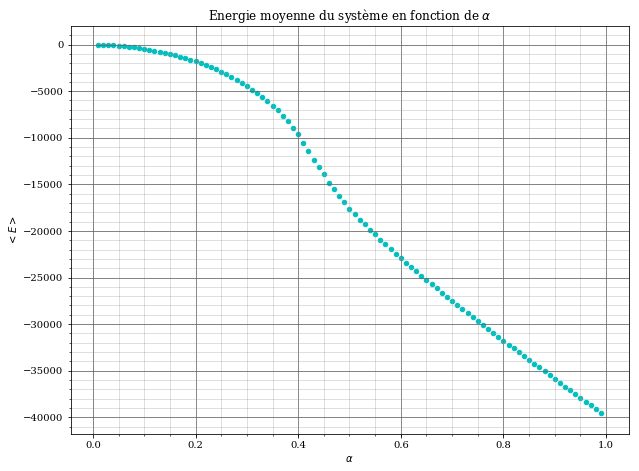

In [55]:
mean_energy_alpha(sp,N,0.01,nx,ny)

<b>Remarque :</b> pour les graphes de l'énergie moyenne on effectue pas de renormalisation comme on l'a fait pour la magnétisation moyenne.

On a effectué le calcul avec $d \alpha=0.001$. Ceci permet de générer 1000 points. Le calcul étant assez long a effectuer, on donne le résultat ci-dessous.

<img src="Energy_1000_points.png" width="500">

Nous sommes à présent en mesure de discuter la valeur du paramètre $\alpha$ à laquelle s'effectue cette transition de phase. Comme déjà évoqué, au-dessus de cette valeur de $\alpha$, $<M>\neq0$ alors qu'en-dessous, $<M>=0$. Car on rappelle que $\alpha\propto 1/T$. 

Il semble, <i>a priori</i>, être compliqué de déterminer cette valeur à partir du graphe de $<M>(\alpha)$ que nous avons obtenu ci-dessus, si ce n'est de le faire à l'oeil nu. Une méthode de détection systèmatique du paramètre de transition de phase semble assez complexe à faire. A l'oeil nu, on estime que $0.35\leq \alpha_c \leq 0.45$.

Le modèle d'Onsager donne toutefois une description exacte d'un système tel que celui que nous venons d'étudier. Ce modèle décrit que la magnétisation, dans un cas isotrope ou la constante de couplage $J$ est la même dans la direction verticale et horizontale, est donnée par la relation, 

$$M=\Big(1-\frac{1}{\sinh^4(2\beta J)}\Big)^{1/8}=\Big(1-\frac{1}{\sinh^4(2\alpha)}\Big)^{1/8}$$

et ce pour $T<T_c \; (\Leftrightarrow \; \alpha>\alpha_c)$.

Notons au passage que la transition ferromagnétique est une transition du second-ordre. L'évolution du paramètre d'ordre en fonction de la température doit donc être continue jusqu'à la tempéarture critique. Le paramètre d'ordre est ici la magnétisation $<M>$.

Or, la magnétisation s'annule à la température critique. On cherche donc $\alpha_c$ tel que,

\begin{align*}
\sinh^4(2\alpha_c)=1 \Leftrightarrow & \; \sinh(2\alpha_c)=1\\
\Leftrightarrow & \; \alpha_c=\frac{\text{arcsinh}(1)}{2}=\frac{\ln(1+\sqrt{2})}{2}\approx 0.44 \\
\end{align*}

Le paramètre $\alpha_c$ théorique est bien inclus dans l'intervalle de notre estimation. 

<br>

Dans ce qui suit, on se propose de regarder l'influence de la valeur de $N$, le nombre d'états générés, et de la taille de la grille $n_x \times n_y$ sur l'allure des graphes de la magnétisation et de l'énergie moyenne. Pour ce faire, on va donc faire varier $N, n_x$ et $n_y$ et regarder le graphique obtenu. Sur chacun des graphiques, on représentera par un tracé mauve la courbe donnant $<M>(\alpha)$ théorique comme décrite par le modèle d'Onsager.

<b>Petit plus :</b> certains temps d'exécution sont très long. On affichera sur chacun des résultats le temps d'exécution $\Delta t$.

On utilisera la fonction suivante qui est une version légèrement modifiée de la fonction <code>mean_magnetisation_alpha()</code>.

In [56]:
def mean_magnetisation_alpha_with_fit(sp,N,d_alpha,nx,ny):
    """
    Plots the evolution of the mean energy observed in the system for each value of alpha.
    
    Parameters:
    -----------
    
    sp : initial spins configuration.
    
    N : number of states to look at.
    
    d_alpha : variation of alpha.
    
    nx: : discretization points in x.
    
    ny : discretization points in y.
    
    """
    start_time=time.time()
    
    fig=plt.figure(figsize=(10,7.5))
    
    alpha=d_alpha
    
    alpha_value=[] # Ces deux listes nous permettront de déterminer la température de Curie plus tard.
    magnetisation_value=[]
    
    while alpha<=1:
        
        initial_state=np.copy(sp)
        
        print(initial_state)
        
        sample_system=[] # On initialise toutes les listes.
        sigma=[]
        
        sample_system=ising_model(initial_state,alpha,N,nx,ny) # On génère N différents états du système par l'algorithme de Metropolis.
        sigma=sommation(sample_system,N) # Calcule la magnétisation totale pour le système k (0<=k<=N).
        
        z=sum(sigma)/(nx*N) # Calcul de la magnétisation moyenne.
        
        plt.scatter(alpha,z,s=20,c='c',marker='o') # On trace <M> en fonction de alpha.
        
        alpha_value.append(alpha)
        magnetisation_value.append(z)
    
        
        print(alpha)
        alpha=alpha+d_alpha
        
        
    # Onsager fit.
    
    alpha_restrict=np.linspace(0.20,1,10000000)
    onsager=100*(1-(1/((np.sinh(2*alpha_restrict))
                   **4)))**(1/8)

    # Customisation du graphique.
    
    ax=plt.gca()
    ax.set_title(r"Magnétisation moyenne du système en fonction de $\alpha$")
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$<M>$")
    plt.plot(alpha_restrict,onsager,color="m",linestyle="--")
    
    handles=[mpl_patches.Rectangle((0, 0), 1, 1, lw=0, alpha=0)] * 4
    
    labels=[]
    labels.append(r"$nx=ny$ = {0:.4g}".format(nx))
    labels.append(r"$N$ = {0:.4g}".format(N))
    labels.append(r"$d_\alpha$ = {0:.4g}".format(d_alpha))
    labels.append(r"$\Delta t$ = {0:.4g} (s)".format(delta))
    ax.legend(handles,labels,facecolor='lightblue',edgecolor="blue")
    
    end_time=time.time()
    delta=end_time-start_time

On commence par une grille d'un total de 100 points ($n_x=n_y=10$) et on fait varier $N$ de 100 à 10 000. Voici les résultats obtenus.

<img src="sample_1.png" width="450" align="left"/>

<img src="sample_2.png" width="450" align="left"/>

<img src="sample_2.png" width="450" align="center"/>

Au plus $N$ devient grand, on plus la <i>zone montante</i> de la courbe s'approche de la valeur théorique du paramètre $\alpha_c$=0.44. Remarquons que pour $\alpha>\alpha_c$, la courbe s'approche extrêment bien de la courbe d'Onsager. En revanche, pour $\alpha<\alpha_c$, on observe une courbe peu précise avec quelques points qui se situent complètement en dehors de l'allure de la courbe.

<br>

On passe maintenant à un total de 2500 points ($n_x=n_y=50$) sur la grille et on fait aussi varier $N$ de 100 à 10 000. Voici les résultats obtenus.

<img src="sample_6.png" width="450" align="left"/>

<img src="sample_7.png" width="450" align="left"/>

<img src="sample_8.png" width="450" align="center"/>

Pour $N$=10 000, on obtient presque une coïncidence parfaite avec la courbe d'Onsager. Pour $N$=100 et $N$=1000, l'allure de la courbe est très satisfaisante. Notons à nouveau la présence de quelques points résiduels pour $N$=1000 et $N$=10 000 mais significativement moins que pour $n_x=n_y=50$. Dans le graphique de $N$=10 000, on observe peu de points entre $0.4\leq \alpha \leq 0.45$ (comparativement à $N$=1000 par exemple). Ceci étant la cause d'une diminution du pas $d_{\alpha}$ dans l'optique de conserver un temps de calcul raisonnable.

<br>

Regardons finalement les graphiques pour un total de 10 000 points ($n_x=n_y=100$) sur la grille.

<img src="sample_4.png" width="450" align="left"/>

<img src="sample_5.png" width="450" align="left"/>

Les courbes obtenues sont très satisfaisantes et régulières. En particulier celle pour $N$=1000 qui est la meilleure que nous ayons pu obtenir, avec un temps de calcul de 19 heures et 15 minutes. Nous aurion aimer lancer un calcul pour $N=10000$, mais le temps de calcul aurait été, en première approximation, de 8 jours !

<br>

Ce qu'il faut donc retenir est qu'au plus $N$ devient grand, au plus la courbe obtenue tends vers celle du modèle théorique d'Onsager. En effet, la courbe d'Onsager est obtenue dans le cas limite où $N\rightarrow \infty$. De plus, au plus la grille comporte de points, au moins il y a de points résiduels qui s'écartent de la courbe.
<br>

<i>Quid</i> de l'énergie ?

Nous n'avons pas passé beaucoup de temps à analyser la courbe de l'énergie et le comportement de l'énergie au point critique de transition de phase. Le seul graphique dont nous disposons est celui présenté plus haut pour une grille de 10 000 points et $N$=100. Clairement, au plus $\alpha$ augmente, c'est-à-dire au plus la température du système diminue, au plus l'énergie diminue. En cause, la dépendance explicite de l'énergie en $\alpha$. On rappelle en effet que l'énergie d'un point de la grille donné est donnée par $E_{i}=-\alpha s_i \sum_{j\in n(i)} s_j$. Aux alentours de $\alpha=0.44$, la forme de la courbe semble être modifié. Pour $\alpha>\alpha_c$, l'énergie forme une courbe concave alors qu'elle semble être une droite pour $\alpha<\alpha_c$. Pour pouvoir trancher, il nous faudrait posséder un graphe plus précis pour l'énergie.

<br>
<br>

3) Effectuer à nouveau l'analyse avec de nouvelles conditions aux limites et une configuration de réseau initiale différente. Par exemple, on pourra supposer que les spins des atomes du bord sont <i>up</i> alors que les spins au sein même du réseau sont distribués de manière aléatoire.

La routine <code>initial_state()</code> va nous permettre de générer une grille dont les spins sont distribués de manière aléatoires. On défini une nouvelle routine où l'on va imposer que les spins des atomes de bord soient <i>up</i> ou <i>down</i>.

In [57]:
def initial_state_up_down(up_down,nx,ny):
    """
    Generate an initial state of spins. Border spins are all up if up_down=1 or all down if up_down=-1
    
    Parameters:
    -----------
    
    up_down : spin orientation of border points.
    
    nx : discretization points in x.
    
    ny : discretization points in y.
    
    Returns:
    --------
    
    r : 2D array of spins
    
    """
    r = np.random.randint(0,2,(nx,ny)) # On génère une "matrice" de taille nx x ny constituée de 0 et 1. Les 0 et 1 sont 
    # distribués selon une distribution uniforme.
    
    r[r==0] =-1 # On assimile les 0 à un état de spin inversé.
    
    if up_down==1:
        r[0]=np.ones(ny)
        r[nx-1]=np.ones(ny)
        for i in range(0,nx):
            r[i][0]=1
            r[i][ny-1]=1
            
    if up_down==-1:
        r[0]=-np.ones(ny)
        r[nx-1]=-np.ones(ny)
        for i in range(0,nx):
            r[i][0]=-1
            r[i][ny-1]=-1
        

    return r

In [58]:
initial_state_up_down(1,10,10)

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1,  1,  1, -1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1],
       [ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1, -1,  1],
       [ 1,  1, -1,  1,  1, -1,  1, -1, -1,  1],
       [ 1, -1,  1, -1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1],
       [ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

On se propose dans ce qui suit de regarder l'évolution de la magnétisation et de l'énergie pour un système dont l'état initial est donné par <code>initial_state_up_down()</code>.

La courbe évoluera-t-elle de la même manière qu'à la question 2) ? Y aura-t-il une transition de phase ? Si oui, la valeur critique de $\alpha$ sera-t-elle toujours la même ?

Afin de limiter les temps de calculs, on prendra $N$=100 et $n_x=n_y=50$. En effet, ces paramètres ont offert d'assez bonne courbes dans la question 2).

On génère dans un premier temps 6 courbes de l'évolution de la magnétisation. Les trois premières avec un spin <i>up</i> pour les spins de bord. Les trois suivantes avec un spin <i>down</i> pour les spins de bord. Pourquoi trois graphes par série ? Afin d'envisager des comparaisons étant donnée que chaques état initial est aléatoire et donc unique. On ne donnera dans la suite que les résultats étant donné que les calculs sont assez longs (de l'ordre de 30 minutes).

<br>

Pour un état intial de spin <i>up</i> pour les spins de bord, on obtient les trois graphiques suivants.

<img src="magnetisation_spin_up_1.png" width="450" align="left"/>

<img src="magnetisation_spin_up_2.png" width="450" align="left"/>

<img src="magnetisation_spin_up_3.png" width="450" align="center"/>

On observe donc fondamentalement un comportement différents au cas où l'état intial est magnétisé.

<br>

Pour un état intial de spin <i>down</i> pour les spins de bord, on obtient les trois graphiques suivants.

<img src="magnetisation_spin_down_1.png" width="450" align="left"/>

<img src="magnetisation_spin_down_2.png" width="450" align="left"/>

<img src="magnetisation_spin_down_3.png" width="450" align="center"/>

On génère de même 6 courbes montrant l'évolution de l'énergie. Trois graphes pour le spin <i>up</i> et trois graphes pour le spin <i>down</i>.

Pour un état intial de spin <i>up</i> pour les spins de bord, on obtient les trois graphiques suivants.

<img src="energy_spin_up_1.png" width="450" align="left"/>

<img src="energy_spin_up_2.png" width="450" align="left"/>

<img src="energy_spin_up_3.png" width="450" align="center"/>

Pour un état intial de spin <i>down</i> pour les spins de bord, on obtient les trois graphiques suivants.

<img src="energy_spin_down_1.png" width="450" align="left"/>

<img src="energy_spin_down_2.png" width="450" align="left"/>

<img src="energy_spin_down_3.png" width="450" align="center"/>

Les questions que l'on se pose maintenant sont les suivantes,

- Pourquoi n'obtient-on pas pas les mêmes courbes que lorsque le système était initialement dans un état magnétisé ?

- Comment interpréter les graphiques obtenus ?

- Pourquoi observe-t-on une tendance croissante de la magnétisation moyenne ?

- Pourquoi la plupart des points sont situés dans l'intervalle $0<|<M>|<60$ ?

- Pourquoi inverser le spin des points du bord inverse-t-il les graphes de la magnétisation moyenne mais pas ceux de l'énergie moyenne ?

<br>

Rappelons dans un premier temps le processus itératif lorsque l'état initial est complètement magnétisé, c'est-à-dire lorsque tous les spins sont <i>up</i> (ou <i>down</i>, la discussion reste inchangée). On modifie alors l'état de spin en rechercheant la configuration minimisant l'énergie. Ainsi, lorsque l'on retourne un spin et qu'il diminue l'énergie de son voisinage, alors on le conserve retourné. Dans le cas où il cause une augmentation de l'énergie de son voisinage, alors on le garde retourné avec une certaine probabilité $e^{-\Delta E}$. Ainsi, au plus $\alpha$ devient grand, au plus $\Delta E$ devient grand (car $\Delta E \propto \alpha$) et au plus il deviendra faible de pouvoir retourner un spin. La magnétisation moyenne tend alors vers $100\%$.

Or, lorsque l'état initial est complètement magnétisé (<i>up</i> ou <i>down</i>), tout retournement du spin va produire une augmentation locale de l'énergie, $\Delta E>0$ et ce indépendamment de la valeur de $\alpha$. L'état initial magnétisé est donc celui qui minimise au mieux l'énergie.

<br>

Observons à présent les deux type de graphes obtenus : d'une part les graphes avec un état initial complètement magnétisé et d'autre part les graphes avec un état initial aléatoire mais de spin de bord <i>up</i>. Dans les deux cas, on observe que pour $\alpha \leq 0.25$ les graphes sont proches de la valeur moyenne $<M>\approx0$. Cette similarité peut se comprendre assez aisément comme nous le verrons. Par suite, on observe que la magnétisation moyenne augmente rapidement pour un état initial magnétisé. Cette croissance semble plus modérée pour un état intial aléatoire. 

Remarquons que pour un état initial magnétisé, la probabilité de retourner un spin <i>up</i> sera donnée par,

$$e^{-\Delta E}=e^{-2\alpha\cdot 1\cdot(1+1+1+1)}=e^{-8 \alpha}$$

Ceci donne numériquement,

\begin{array}{c|c}
\alpha & e^{-6 \alpha} \\ \hline
0 & 1\\
0.1 & \sim 0.45 \\
0.2 & \sim 1/5 \\
0.4 & \sim 0.04 \\
0.6 & \sim 0.008 \\
0.8 & \sim 0.002 \\
0.9 & \sim 0.0007 \\
1 & \sim 0.0003 \\
\end{array}

Donc, pour $\alpha=0$, chacun des spins <i>up</i> sera retourné et on finira avec un état de magnétisation opposée à la magnétisation initiale. On obtient donc trivialement une magnétisation moyenne nulle. Du moins ceci est valable en théorie. En pratique, la routine <code>ising_model()</code> choisi un point aléatoire de la grille et le retourne. On ne peut pas garantir qu'après un certain nombre d'essai, tous les points aient été retourné. Pour $\alpha=0.2$, la probabilité de retourner un spin est d'$1/5$. Il est donc assez probable de retourner des spins et on obtiendra une magnétisation moyenne qui sera assez proche de 0 mais toutefois positive car il y aura toujours plus de spins <i>up</i>. Au plus la valeur de $\alpha$ augmente, il plus il deviendra très peu probable d'avoir des spins <i>down</i>. La magnétisation moyenne augmente donc. L'évolution de la magnétisation moyenne dans le cas d'un état initial magnétisé se comprend donc assez aisément.

<br>

Venons-en maintenant à un état initial qui est aléatoire sauf pour les points de bords. Afin d'entamer notre discussion, nous effectuerons une hypothèse assez importante qui est la suivante. On sait que tous les spins qui ne se trouvent pas au bord de la grille sont aléatoirement distribués. On supposera donc que <b>la magnétisation totale de ces spins est nulle</b>. Cette approximation est-elle légitime ? Vérifions-le à l'aide de la routine suivante.

In [59]:
def hypothesis_test(N,nx,ny):
    """
    Returns distribution of total magnetisation for N initial states generated.
    
    Parameters:
    -----------
    
    N : number of stated to generate.
    
    nx: : discretization points in x.
    
    ny : discretization points in y.
    
    Returns:
    --------
    
    magnetisation : N values of the total magnetisation for each of the N state.
    
    """
    
    sample=[]
    for i in range(0,N):
        sample.append(initial_state(nx,ny))
        
    magnetisation_tot=sommation(sample,N)
    
    fig=plt.figure(figsize=(10,7.5))
    
    ax=plt.gca()
    binwidth=1
    bins=np.arange(-150,150,binwidth) 
    plt.hist(magnetisation_tot,bins,normed=True)
    ax.xaxis.grid() 
    
    
    return magnetisation_tot

C:\Users\Nicolas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


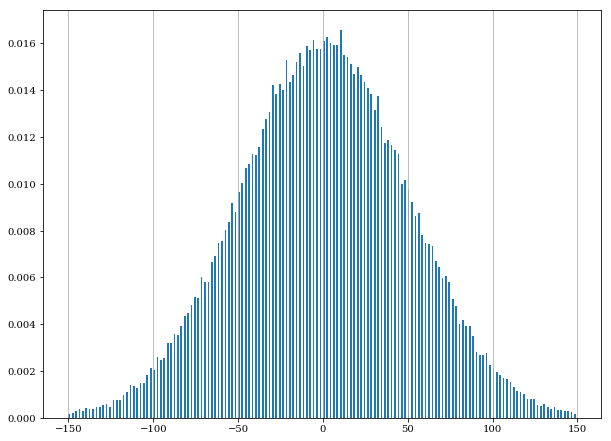

In [60]:
histogram=hypothesis_test(100000,50,50)

La magnétisation totale est donc en moyenne nulle. On peut donc continuer notre discussion. 


Nous voulons comprendre pourquoi pour un état initial aléatoire donné par <code>initial_state_up_down()</code> la magnétisation moyenne ne dépasse que très rarement $<M>=60$. Pour le comprendre, on doit s'intéresser à la propagation des spins de bord. Supposons pour ce faire que les spins de bords soient tous <i>up</i>. Dans la configuration initiale on a donc $4\cdot 49=196$ spins <i>up</i> en moyenne. Regardons les deux configurations de bord possibles (par exemple le bord gauche) :

<br>

<center>
$\begin{array}{ccc}
   & 1 &   \\
 1 & 1 & \mathbf{\color{red} {1}}  \\
   & 1 &   \\
\end{array}
\quad \hspace{1.5cm} \Longrightarrow \hspace{1.5cm}
\begin{array}{ccc}
   & 1 &   \\
 1 & 1 & \mathbf{\color{red} {-1}}\\
   & 1 &   \\
\end{array}$
</center>

Calculons l'énergie pour passer de la configuration de gauche à celle de droite. L'énergie initiale de la configuration de gauche vaut $E=-\alpha(1+1+1+1)=-4\alpha$. L'énergie de la configuration de droite vaut $E=-\alpha(1+1+1-1)=-2\alpha$. Ainsi, $\Delta E=2\alpha$.

De même calculons l'énergie associée à la transition invserse.

<center>
$\begin{array}{ccc}
   & 1 &   \\
 1 & 1 & \mathbf{\color{red} {-1}}  \\
   & 1 &   \\
\end{array}
\quad \hspace{1.5cm} \Longrightarrow \hspace{1.5cm}
\begin{array}{ccc}
   & 1 &   \\
 1 & 1 & \mathbf{\color{red} {1}}\\
   & 1 &   \\
\end{array}$
</center>

Calculons l'énergie pour passer de la configuration de gauche à celle de droite. L'énergie initiale de la configuration de gauche vaut $E=-\alpha(1+1+1-1)=-2\alpha$. L'énergie de la configuration de droite vaut $E=-\alpha(1+1+1+1)=-4\alpha$. Ainsi, $\Delta E=-2\alpha$.


On remarque donc que dans le second cas, le spin <i>down</i> sera toujours retourné en un spin <i>up</i> car $e^{0.2}>1$. Dans le premier cas, il sera retourné avec une probabilité de $e^{-0.2}\approx 0.14$. On va compter le nombre de spins <i>up</i> total sur les côtés de chacun des sous-carré (cf. illustration).

<img src="carré.jpg" width="600" align="center"/>

Ainsi, le sous-carré $k$ comporte $4\cdot(50-2k-1)$ points. Avant que l'algorithme de Metropolis ait été effectué sur chacun de ses points, on a $2\cdot (50-2k-1)$ spins <i>down</i> et $2\cdot (50-2k-1)$ <i>up</i> en moyenne. Après l'algorithme de Metropolis, les $2\cdot (50-2k-1)$ spins <i>down</i> deviendront des spins <i>up</i>. Quant au nombre de spins <i>up</i> initial, il va diminuer tel que après l'algorithme il y en ait, 

$$2\cdot (50-2k-1)-2\cdot (50-2k-1)\cdot e^{-0.2\alpha}=2\cdot (50-2k-1)(1-e^{-0.2\alpha})$$

On peut donc écrire qu'après l'algorithme de Metroplis, le nombre de spins <i>up</i> sur le sous-carré $k$ est donné par,

$$2\cdot (50-2k-1)+2\cdot (50-2k-1)(1-e^{-0.2\alpha})=2\cdot (50-2k-1)(2-e^{-0.2\alpha})$$

Dans notre cas, nous avons 25 sous-carrés possibles. Ainsi, le nombre total de spin <i>up</i> $n_+(\alpha)$ en fonction de $\alpha$ sera donné par,

$$n_+(\alpha)=2\sum_{k=0}^{24}(50-2k-1)(2-e^{-0.2\alpha})$$

Or, rappelons que l'algorithme de Metropolis n'agit pas sur le sous-carré $k=0$ car il s'agit de nos conditions initiales. Ainsi, on a donc que,

$$n_+(\alpha)=4\cdot49 + 2\sum_{k=1}^{24}(50-2k-1)(2-e^{-0.2\alpha})=196 + 2\sum_{k=1}^{24}(50-2k-1)(2-e^{-0.2\alpha})$$

On trouve pour $\alpha=0.9$ que $n_+(0.9)=1538$. Ainsi ceci donnerait que $<M>=62$, ce qui est exactement le résultat attendu. Ou encore, $n_+(1)=1557$ ce qui donne $<M>=62$.

<br>

Avec ceci, on a donc expliqué le comportement des graphes pour une condition initiale aléatoire. On a de plus expliqué pourquoi on observe graphiquement que $<M>\in[0,60]$ pour la plupart des points.

Lorsque l'on inverse le spin des atomes de bord, la même discussion s'applique mais au signe près, d'où le fait que la courbe soit inversée.

<br>

Examinons à présent le comportement de l'énergie. On voit qu'indépendamment de la condition initiale et de l'orientation des spins de bords, l'allure des graphes est la même. Pourquoi ? 

On remarque aussi qu'au-delà du paramètre critique $\alpha_c$ de transition, la courbe de l'énergie devient plus grossière et les points davantages dispersés. Comment expliquer ceci ?

<br>

Afin de comprendre ceci, on va utiliser notre raisonnement précédent. L'idée est que calculer l'énergie moyenne sur un ensemble d'états donnés par <code>ising_model()</code> revient à calculer l'énergie d'un état magnétisé mais comprenant $n_+(\alpha)$ spins <i>up</i> que l'on aditionne par l'énergie d'un état magnétisé constitué de $2500-n_+(\alpha)$ spins <i>down</i>.

Montrons que ceci est effectivement correct. o

On commence par générer un état initial aléatoire. Calculons l'énergie moyenne des états donnés par <code>ising_model()</code>. On effectue une moyenne sur 20 valeurs pour $\alpha=0.8$.

In [61]:
def energy_test(sp,alpha,N,nx,ny,mean=20):
    """
    Compute mean energy of Metyroplis states for a given value of alpha.
    
    Parameters :
    ------------
    
    sp : initial spins configuration.
    
    alpha : coupling constant.
    
    N : number of states to generate.
    
    nx: :discretization points in x.
    
    ny : discretization points in y.
    
    mean : number of values of the energy to compute.
    
    Returns :
    ---------
    
    mean : mean energy.
    
    """
    
    final=[]

    for j in range(0,mean):
    
        sample=ising_model(sp,alpha,N,nx,ny)
        energy=[]

        for i in range(0,N):
            
            energy.append(energy_system(sample[i],alpha,nx,ny))
        
        np.array(energy)
        total=sum(energy)/100
        final.append(total)

    np.array(final)
    mean=np.mean(final)
    return mean

In [87]:
nx=ny=50
N=100
sp=initial_state_up_down(1,50,50)

In [88]:
energy_test(sp,0.8,100,50,50,mean=20)

On obtient donc $-7904$ comme valeur moyenne de l'énergie (cette valeur est différente si la cellule ci-dessus à été à nouveau lancée). Or, on a que $n_+(0.8)=1518$. Or, $\sqrt{1518}\approx 39$. Calculons donc l'énergie d'un état de $39\cdot39$ spins <i>up</i>.

In [89]:
nx=ny=39
sp=np.ones([nx,ny])

In [90]:
energy_test(sp,0.8,100,nx,ny,mean=20)

$2500-1518=982$ et $\sqrt{982}\approx 31$. Calculons donc l'énergie d'un état de $31\cdot31$ spins <i>down</i>.

In [66]:
nx=ny=31
sp=np.ones([nx,ny])

In [67]:
energy_test(sp,0.8,100,nx,ny,mean=20)

La somme des deux énergies trouvées vaut donc $-7881$ ce qui est très proche de la valeur moyenne d'énergie des états produit par le modèle d'Ising qui vaut $-7873$. La différence étant notamment induite par notre approximation des racines carrées.

<br>

Avec ceci, on a donc montré que lorsque l'état initial est aléatoire, on peut toujours se ramener à calculer la valeur moyenne de l'énergie sur des états uniforméments magnétisés. D'où l'équivalence du graphe de l'énergie moyenne lorsque l'état initial est uniformément magnétisé ou aléatoire.

Concernant le fait que le graphe de l'énergie n'est pas inversé si l'on inverse les spins de bord, il suffit de refaire le raisonnement ci-dessous. On observera alors que les énergies sont les mêmes.

Exemple :

In [68]:
sp=initial_state_up_down(-1,50,50)

In [69]:
energy_test(sp,0.8,100,50,50,mean=20)

In [70]:
nx=ny=39
sp=-np.ones([nx,ny])

In [71]:
energy_test(sp,0.8,100,nx,ny,mean=20)

In [72]:
nx=ny=31
sp=-np.ones([nx,ny])

In [73]:
energy_test(sp,0.8,100,nx,ny,mean=20)

On observe bien que le résultat est identique. Ceci est évidemment une conséquence de la relation donnant l'énergie,

$$E_{i}=-\alpha s_i \sum_{j\in n(i)} s_j=-\alpha (-s_i) \sum_{j\in n(i)} (-s_j)$$

<br>

Outre l'aspect particulier de notre discussion jusqu'à présent, discutons de la physique des résultats obtenus. Dans le cas où l'état initial est un état aléatoire sauf pour les spins de bords (on pense par exemple à une feuille d'un matériau ferromagnétique uniquement magnétisée sur les côtés), la magnétisation moyenne du système va effectivement diminuer au fur et à mesure que la température augmente, comme dans le cas d'un état initialement magnétisé. Mais le système ne subira pas de transition de phase car il ne pourra jamais être entièrement magnétisé. En effet, on a montré que pour des valeurs proches de $\alpha=1$, la magnétisation moyenne ne sera jamais au-dessus de $<M>=62$. En revanche, l'énergie du système diminue bien à mesure que la température diminue, et ce comme dans le cas où l'état est initialement magnétisé, comme on l'a montré ci-dessus.